# 95788: Assignment 3

## Table of Contents

1. **Section 1:** Importing, Cleaning, and Finalising Dataset
2. **Section 2:** Data Preprocessing and Feature Engineering
3.**Section 3:** Categorical Encoding and Feature Engineering
4. **Section 4:** Baseline Model - Multiple Linear Regression
5. **Section 5:** Champion Model - LightGBM
  1. *Untuned Baseline Model*
  2. *Feature Selection and Feature Importance*
  3. *Gridsearch and Hyperparameter Tuning*
  4. *Final Champion Model*
  5. *Cross-Validation Methods*
  6. *Extreme Values*
  7. Comparison: XGBoost
6. **Section 6:** Challenger Model - Neural Network
  1. *Untuned Model*
  2. *Keras Parameter Tuning*
  3.*Extreme Values*
7. **Section 7:** Real Predictions
8. **Section 8:** Validating Predictions

# Section 1: Importing, Cleaning, and Finalising Dataset
In this section, I imported the necessary python packages and the data. First, I installed *pandas, numpy, matplotlib, seaborn, scipy, datetime (to convert dates), xgboost (ML package), joblib, and json.

Next, I installed *tensorflow, category_encoders, and sklearn, and GridSearchCV*, all necessary for the Machine Learning model optimization and data cleaning.

In [1]:
# Primary Packages for Cleaning and Data Installation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
!pip install xgboost
from xgboost import XGBRegressor
import joblib
import json

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 1.4 MB/s eta 0:00:00


In [2]:
# ML Packages

!pip install category_encoders
import category_encoders as ce
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
!pip install lightgbm
from lightgbm import LGBMRegressor
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 892.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.4 MB/s eta 0:00:00


In [3]:
# Importing the dataset

from google.colab import drive
drive.mount('/content/drive')
annual_report_df = pd.read_json('/content/drive/My Drive/AnnualReport.json')
apartment_df = pd.read_json('/content/drive/My Drive/Apartment.json')
housing_association_df = pd.read_json('/content/drive/My Drive/HousingAssociation.json')

Mounted at /content/drive


## Merging Datasets

In [4]:
# Merging 'Apartment' with 'Housing Association'

apartment_full_df = pd.merge(apartment_df, housing_association_df, left_on='housing_association_org_number', right_on='org_number', how='left')

apartment_full_df.head()

id   sell_date  sell_price  rooms  \
0  0000e3917662f30720d1801912f45349  2018-11-12   3600000.0    1.0   
1  00015e9ff97f3e12967d8551251c474a  2015-02-12   2600000.0    4.0   
2  00019f77d6a0491134d07b85e509acd7  2020-11-13   5250000.0    3.0   
3  00020bc71344a6749b66097b33d4e0a1  2015-03-26   5900000.0    3.0   
4  0002b768f2cfd98f1768a875ef773e2b  2014-01-16   1300000.0    2.0   

       legal_district  postcode                         locality  \
0            Vasastan     11349                Innanför tullarna   
1  Hässelby-Vällingby     16561                         Hässelby   
2         Kungsholmen     11259                Innanför tullarna   
3              Gärdet     11553                Innanför tullarna   
4       Spånga-Tensta     16361  Kista/Hässelby/Vällingby/Spånga   

     street_name object_type    street_address  ... has_balcony  \
0      Frejgatan   Apartment      Frejgatan 10  ...         NaN   
1  Medsolsbacken   Apartment  Medsolsbacken 17  ...         NaN   
2   Rålambsvägen   Apartment   Rålambsvägen 21  ...         NaN   
3     Värtavägen   Apartment     Värtavägen 23  ...         NaN   
4  Holmingegränd   Apartment  Holmingegränd 13  ...         NaN   

   has_fireplace  has_patio is_new_construction  width  height  \
0            NaN        NaN                 NaN    NaN     NaN   
1            NaN        NaN                 NaN    NaN     NaN   
2            NaN        NaN                 NaN    NaN     NaN   
3            NaN        NaN                 NaN    NaN     NaN   
4            NaN        NaN                 NaN    NaN     NaN   

   housing_association_org_number   org_number  \
0                     716418-1401  716418-1401   
1                     769607-9966  769607-9966   
2                     769604-9803  769604-9803   
3                     716419-3067  716419-3067   
4                     702002-1908  702002-1908   

                              name  construction_year  
0                    BRF Ingemar 3             1886.0  
1           BRF Gästsalen 1, 2 & 3                NaN  
2               BRF Signallyktan 1             1944.0  
3                 BRF Röda Rosen 6             1934.0  
4  Riksbyggen BRF Stockholmshus 24             1968.0  

[5 rows x 33 columns]

# Section 2: Data Preprocessing and Feature Engineering
In this section, I modify and combine features to ensure the ML model can make full use of the data available. This includes:
1. Clustering geographical coordinates.
2. Calculating new metrics related to area, amenities, and costs.
3. Encoding categorical variables.
4. Creating ratios and interaction terms.
5. Applying transformations to handle missing values and prepare the data for modeling.



In [5]:
# Convert columns to numeric (we coerce the errors to NaN)
numeric_columns = [
    'association_tax_liability',
    'long_term_debt_other',
    'long_term_real_estate_debt',
    'total_living_area',
    'total_loan',
    'savings']

for col in numeric_columns:
    annual_report_df[col] = pd.to_numeric(annual_report_df[col], errors='coerce')

# Group by and aggregate
aggregated_annual_reports = annual_report_df.groupby('org_number').agg({
    'association_tax_liability': 'mean',
    'long_term_debt_other': 'mean',
    'long_term_real_estate_debt': 'mean',
    'number_of_rental_units': 'sum',
    'number_of_units': 'sum',
    'total_commercial_area': 'sum',
    'total_living_area': 'mean',
    'total_loan': 'mean',
    'total_plot_area': 'sum',
    'total_rental_area': 'sum',
    'savings': 'mean',
    'fiscal_year': 'max',
    'housing_coop_id': 'first',
    'plot_is_leased': 'max'
}).reset_index()

# Merge DataFrames
final_df = pd.merge(apartment_full_df, aggregated_annual_reports, left_on='housing_association_org_number', right_on='org_number', how='left')


Here, removed 11 rows of data, because the house types 'Twin House' and 'Row House' were sparse in the dataset, meaning that these would not have much predictive power if we choose to incorporate them into the model.

In [6]:
# Comparing columns and removing duplicates

def remove_duplicate_columns(df):
    duplicates = {}

    for i, col1 in enumerate(df.columns):
        for j, col2 in enumerate(df.columns[i + 1:]):
            if df[col1].equals(df[col2]):
                if col2 not in duplicates:
                    duplicates[col2] = col1

    df = df.drop(columns=duplicates.keys())
    return df

final_df = remove_duplicate_columns(final_df)

print("Number of rows before removal:", final_df.shape[0])

final_df = final_df[~final_df['object_type'].isin(['Twin House', 'Rowhouse'])]
print("Number of rows after removal:", final_df.shape[0])

Number of rows before removal: 178962
Number of rows after removal: 178951


In [7]:
# Converting and Formatting Date/Time Columns

# We create a new column, 'sell_date_fixed', by formatting 'sell_date' to 'YYYYMMDD', and then convert it to an integer

final_df['sell_date'] = pd.to_datetime(final_df['sell_date'])
final_df['sell_date_fixed'] = final_df['sell_date'].dt.strftime('%Y%m%d').astype(int)

# Extracting the year from the dates by integer division
df = final_df
df['sell_year'] = df['sell_date_fixed'] // 100


## Processing Missing Values
I use the mode imputation method to fill in missing values for categorical data, and use the mean imputation method for continuous numerical data. Also filled missing values with '0' where it is determined to be a reasonable default.

In [8]:
# Missing values for 'rooms'
mode_value_rooms = df['rooms'].mode()[0]
df['rooms_fixed'] = df['rooms'].fillna(mode_value_rooms)

# Mapping and filling missing values for 'energy_class'
mapping = {'A': "1", 'B': "2", 'C': "3", 'D': "4", 'E': "5", 'F': "6", 'G': "7"} # map the energy class letter to numerical values
df['energy_class_fixed'] = df['energy_class'].replace(mapping)
mode_value_energy = df['energy_class_fixed'].mode()[0]
df['energy_class_fixed'].fillna(mode_value_energy, inplace=True)
df['energy_class_fixed'] = df['energy_class_fixed'].astype(int)

# Missing values for 'has_solar_panels'
df['has_solar_panels_fixed'] = df['has_solar_panels'].fillna(0)

# Missing values for 'living_area'
mean_living_area_by_rooms = df.groupby('rooms')['living_area'].transform('mean')
df['living_area_fixed'] = df['living_area'].fillna(mean_living_area_by_rooms)
overall_mean_living_area = df['living_area'].mean()
df.loc[df['rooms'].isna() & df['living_area_fixed'].isna(), 'living_area_fixed'] = overall_mean_living_area

# Missing values for 'additional_area'
df['additional_area_fixed'] = df['additional_area'].fillna(0)

# Missing values for 'floor'
mode_value_floors = df['floor'].mode()[0]
df['floor_fixed'] = df['floor'].fillna(mode_value_floors)

# Converting 'postcode' to integer format
df['post'] = df['postcode'] // 100


For the 'rent' column, we fill missing values using a three-step process:

1. I calculated mean rent, grouped by 'sell_year', 'postcode', and 'rooms' to ensure more accuracy in imputation.

2. If values were found to be missing after this step, I decided to fill it with the mean rent grouped by 'sell_year' and 'rooms'.

3. If it was *still* missing, I decided to impute values with the overall mean rent.

This process was repeated for a few other variables.

In [9]:
# Missing values for 'rent'

grouped_means_rent = df.groupby(['sell_year', 'postcode', 'rooms'])['rent'].transform('mean')
df['rent_fixed'] = df['rent'].fillna(grouped_means_rent)

grouped_means_rent2 = df.groupby(['sell_year', 'rooms'])['rent'].transform('mean')
df['rent_fixed'] = df['rent_fixed'].fillna(grouped_means_rent2)

grouped_means_rent3 = df.groupby(['rooms'])['rent'].transform('mean')
df['rent_fixed'] = df['rent_fixed'].fillna(grouped_means_rent3)

overall_mean_rent = df['rent'].mean()
df['rent_fixed'] = df['rent_fixed'].fillna(overall_mean_rent)


In [10]:
# Missing values for 'operating_cost'

grouped_means_opcost = df.groupby(['sell_year', 'post', 'rooms'])['operating_cost'].transform('mean')
df['operating_cost_fixed'] = df['operating_cost'].fillna(grouped_means_opcost)

grouped_means_opcost2 = df.groupby(['sell_year', 'rooms'])['operating_cost'].transform('mean')
df['operating_cost_fixed'] = df['operating_cost_fixed'].fillna(grouped_means_opcost2)

grouped_means_opcost3 = df.groupby(['rooms'])['operating_cost'].transform('mean')
df['operating_cost_fixed'] = df['operating_cost_fixed'].fillna(grouped_means_opcost3)

overall_mean_opcost = df['operating_cost'].mean()
df['operating_cost_fixed'] = df['operating_cost_fixed'].fillna(overall_mean_opcost)


In [11]:
# Missing values for 'asking_price'

grouped_means_asking = df.groupby(['sell_year', 'post', 'rooms'])['asking_price'].transform('mean')
df['asking_price_fixed'] = df['asking_price'].fillna(grouped_means_asking)

grouped_means_asking2 = df.groupby(['sell_year', 'rooms'])['asking_price'].transform('mean')
df['asking_price_fixed'] = df['asking_price_fixed'].fillna(grouped_means_asking2)

grouped_means_asking3 = df.groupby(['rooms'])['asking_price'].transform('mean')
df['asking_price_fixed'] = df['asking_price_fixed'].fillna(grouped_means_asking3)

overall_mean_asking_price = df['asking_price'].mean()
df['asking_price_fixed'] = df['asking_price_fixed'].fillna(overall_mean_asking_price)


In [12]:
# Mapping and filling missing values for 'association_tax_liability'

tax_map = {'lowered_tax_liability': 0, 'standard_tax_liability': 1, 'other': 2}
df['association_tax_liability_fixed'] = df['association_tax_liability'].map(tax_map)

if df['association_tax_liability_fixed'].notna().any():
    mode_value_tax = df['association_tax_liability_fixed'].mode()[0]
    df['association_tax_liability_fixed'].fillna(mode_value_tax, inplace=True)
else:
    print("Error: 'association_tax_liability_fixed' column is empty or contains only NaN values.")


Error: 'association_tax_liability_fixed' column is empty or contains only NaN values.


In [13]:
# Missing values for all other columns

df['long_term_debt_other_fixed'] = df['long_term_debt_other'].fillna(0)
df['long_term_real_estate_debt_fixed'] = df['long_term_real_estate_debt'].fillna(0)
df['number_of_rental_units_fixed'] = df['number_of_rental_units'].fillna(0)
mode_value_units = df['number_of_units'].mode()[0]
df['number_of_units_fixed'] = df['number_of_units'].fillna(mode_value_units)
df['plot_is_leased_fixed'] = df['plot_is_leased'].fillna(0)
mean_value_savings = df['savings'].mean()
df['savings_fixed'] = df['savings'].fillna(mean_value_savings)
df['total_commercial_area_fixed'] = df['total_commercial_area'].fillna(0)
mean_value_total_living_area = df['total_living_area'].mean()
df['total_living_area_fixed'] = df['total_living_area'].fillna(mean_value_total_living_area)
df['total_loan_fixed'] = df['total_loan_fixed'] = df['total_loan'].fillna(0)
df['total_plot_area_fixed'] = df['total_plot_area'].fillna(0)
df['total_rental_area_fixed'] = df['total_rental_area'].fillna(0)
mode_value_year = df['construction_year'].mode()[0]
df['construction_year_fixed'] = df['construction_year'].fillna(mode_value_year)


## Categorical Encoding and Feature Engineering
I use the *category_encoders, KMeans, numpy, pandas, and datetime* functions to perform feature engineering and categorically encode data.

In [14]:
# Importing necessary packages

import category_encoders as ce
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from datetime import datetime

# Initialising target encoder
encoder = ce.TargetEncoder()


In [15]:
# Location metrics

## We cluster the properties into 10 geographical clusters based on latitude and longitude
coords = df[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=10, random_state=42)
df['geo_cluster'] = kmeans.fit_predict(coords)

## Postcode to string
df['post'] = df['postcode'].astype(str)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
# New Area Metrics

## Creating 'total_property_area'
df['total_property_area'] = (
    df['living_area_fixed'] +
    df['additional_area_fixed'] +
    df['total_plot_area_fixed']
)

## Creating 'avg_room_area' and volume
df['avg_room_area'] = df['living_area_fixed'] / df['rooms_fixed']
df['property_volume'] = (
    df['living_area_fixed'] *
    df['width'] *
    df['height']
)

## Calculating and creating 'rent_per_sqm'
df['rent_per_sqm'] = df['rent_fixed'] / df['living_area_fixed']


In [17]:
# Asking Price and Cost Metrics
median_asking_price = df['asking_price_fixed'].median()
df['asking_price_ratio'] = df['asking_price_fixed'] / median_asking_price
df['price_per_sqm'] = df['asking_price_fixed'] / df['living_area_fixed']
df['operating_cost_to_living_area_ratio'] = df['operating_cost_fixed'] / df['living_area_fixed']
df['cost_efficiency_ratio'] = df['operating_cost_fixed'] / df['rent_fixed']


In [18]:
# Housing Association Metrics
df['total_units'] = (
    df['number_of_rental_units_fixed'] +
    df['number_of_units_fixed']
)
df['total_area'] = (
    df['total_commercial_area_fixed'] +
    df['total_living_area_fixed'] +
    df['total_plot_area_fixed'] +
    df['total_rental_area_fixed']
)
df['residential_to_commercial_ratio'] = (
    df['total_living_area_fixed'] /
    df['total_commercial_area_fixed'].replace(0, 1)
)


In [19]:
# Property Age

## We calculate property age, then categorise them into bins and fill the missing values with the bin median.
current_year = datetime.now().year
df['property_age'] = current_year - df['construction_year_fixed']
bins = [0, 5, 10, 20, 30, 50, 100, float('inf')]
labels = ['0-5', '6-10', '11-20', '21-30', '31-50', '51-100', '100+']
df['age_category'] = pd.cut(df['property_age'], bins=bins, labels=labels)

df['property_age'] = pd.to_numeric(df['property_age'], errors='coerce')
df['property_age'].fillna(df['property_age'].median(), inplace=True)


In [20]:
# applying an exponential decay transformation to property age so it is taken into consideration as a weighted feature by the model
df['weighted_property_age'] = np.exp(-0.01 * df['property_age'])


In [21]:
# Interaction between Construction and Property Age
df['age_new_construction_interaction'] = df.apply(
    lambda row: -row['property_age'] if row['is_new_construction'] else row['property_age'],
    axis=1
)
if df['is_new_construction'].dtype != 'bool':
    df['is_new_construction'] = df['is_new_construction'].astype(bool)


In [22]:
# New Amenities Metrics

## We decided to give a 'luxury score' and a 'sustainability_score' nased on whether or not the apartment has additional amenities (balcony, fireplace, patio) and eco-friendly energy (solar panels)
df['luxury_score'] = (
    df['has_balcony'] +
    df['has_fireplace'] +
    df['has_patio']
)
df['sustainability_score'] = df['has_solar_panels_fixed']


In [23]:
# Encoding categorical variables (to strings)
df['housing_coop_id'] = df['housing_coop_id'].astype(str)
df['agency_id'] = df['agency_id'].astype(str)
df['housing_association_org_number'] = df['housing_association_org_number'].astype(str)


In [24]:
df.head()


id  sell_date  sell_price  rooms  \
0  0000e3917662f30720d1801912f45349 2018-11-12   3600000.0    1.0   
1  00015e9ff97f3e12967d8551251c474a 2015-02-12   2600000.0    4.0   
2  00019f77d6a0491134d07b85e509acd7 2020-11-13   5250000.0    3.0   
3  00020bc71344a6749b66097b33d4e0a1 2015-03-26   5900000.0    3.0   
4  0002b768f2cfd98f1768a875ef773e2b 2014-01-16   1300000.0    2.0   

       legal_district  postcode                         locality  \
0            Vasastan     11349                Innanför tullarna   
1  Hässelby-Vällingby     16561                         Hässelby   
2         Kungsholmen     11259                Innanför tullarna   
3              Gärdet     11553                Innanför tullarna   
4       Spånga-Tensta     16361  Kista/Hässelby/Vällingby/Spånga   

     street_name object_type    street_address  ... cost_efficiency_ratio  \
0      Frejgatan   Apartment      Frejgatan 10  ...              0.430858   
1  Medsolsbacken   Apartment  Medsolsbacken 17  ...              0.121316   
2   Rålambsvägen   Apartment   Rålambsvägen 21  ...              0.213808   
3     Värtavägen   Apartment     Värtavägen 23  ...              0.165401   
4  Holmingegränd   Apartment  Holmingegränd 13  ...              0.073569   

   total_units  total_area residential_to_commercial_ratio  property_age  \
0         84.0     2670.00                        3.158879         138.0   
1        680.0    18761.25                       19.406855          95.0   
2         86.0     3120.00                        8.629630          80.0   
3         96.0     2339.00                        3.678000          90.0   
4        544.0   118538.00                       18.599359          56.0   

   age_category  weighted_property_age  age_new_construction_interaction  \
0          100+               0.251579                            -138.0   
1        51-100               0.386741                             -95.0   
2        51-100               0.449329                             -80.0   
3        51-100               0.406570                             -90.0   
4        51-100               0.571209                             -56.0   

   luxury_score  sustainability_score  
0           NaN                   0.0  
1           NaN                   0.0  
2           NaN                   0.0  
3           NaN                   0.0  
4           NaN                   0.0  

[5 rows x 89 columns]

In [25]:
# Visualising Datasets
df_with_sell_price = final_df[final_df['sell_price'] > 0]
df_with_sell_price.head()

df_without_sell_price = final_df[(final_df['sell_price'] == 0) | (final_df['sell_price'].isna())]
df_without_sell_price.head()

id  sell_date  sell_price  rooms  \
17   00069bea47457ba3481d5dd18d261768 2023-08-31         NaN    3.0   
23   00090ebf77bac09d3ba2687da05bc450 2023-10-12         NaN    3.0   
24   0009182b9d124db1b297f605ce6b8cc7 2023-08-31         NaN    2.0   
66   00195b396970db56d69e4764d7c8471d 2023-08-11         NaN    1.0   
203  004f85fed27e54fb0464441ae72c353a 2023-08-27         NaN    3.0   

            legal_district  postcode           locality      street_name  \
17           Spånga-Tensta     16356             Spånga  Norrskensbacken   
23        Hammarby Sjöstad     12066     Katarina/Sofia      Virkesvägen   
24               Skarpnäck     12130     Hammarbyhöjden  Sofielundsvägen   
66   Hägersten-Liljeholmen     12933     Hägerstensåsen        Bäckvägen   
203       Norra Djurgården     11422  Innanför tullarna    Valhallavägen   

    object_type      street_address  ... cost_efficiency_ratio  total_units  \
17    Apartment  Norrskensbacken 1B  ...              0.077316         75.0   
23    Apartment      Virkesvägen 9A  ...              0.134236        148.0   
24    Apartment  Sofielundsvägen 33  ...              0.182946        580.0   
66    Apartment       Bäckvägen 108  ...              0.199777         54.0   
203   Apartment    Valhallavägen 49  ...              0.289421        143.0   

     total_area residential_to_commercial_ratio  property_age  age_category  \
17       2710.0                        3.704861          25.0         21-30   
23      11196.5                     5076.500000           4.0           0-5   
24       8938.0                        5.142955           7.0          6-10   
66        739.0                      739.000000          81.0        51-100   
203      1956.0                        1.925466          93.0        51-100   

     weighted_property_age  age_new_construction_interaction  luxury_score  \
17                0.778801                             -25.0           NaN   
23                0.960789                              -4.0           NaN   
24                0.932394                              -7.0           NaN   
66                0.444858                             -81.0           NaN   
203               0.394554                             -93.0           NaN   

     sustainability_score  
17                    0.0  
23                    0.0  
24                    0.0  
66                    0.0  
203                   0.0  

[5 rows x 89 columns]

In [26]:
# Obtaining the range of sell dates

# For properties with a sell price
df_with_sell_price = final_df[final_df['sell_price'] > 0]
min_date_with_price = df_with_sell_price['sell_date'].min()
max_date_with_price = df_with_sell_price['sell_date'].max()

print("Range of sell_dates for properties with a sell price:")
print(f"Minimum date: {min_date_with_price}")
print(f"Maximum date: {max_date_with_price}")

# For properties without a sell price
df_without_sell_price = final_df[(final_df['sell_price'] == 0) | (final_df['sell_price'].isna())]
min_date_without_price = df_without_sell_price['sell_date'].min()
max_date_without_price = df_without_sell_price['sell_date'].max()

print("\nRange of sell_dates for properties without a sell price:")
print(f"Minimum date: {min_date_without_price}")
print(f"Maximum date: {max_date_without_price}")


Range of sell_dates for properties with a sell price:
Minimum date: 2013-01-02 00:00:00
Maximum date: 2023-08-01 00:00:00

Range of sell_dates for properties without a sell price:
Minimum date: 2023-08-02 00:00:00
Maximum date: 2023-10-30 00:00:00


In [27]:
# Scaling Dataset

from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np

# Replace infinite values with NaN
df_with_sell_price.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values with column means for numeric columns
numeric_cols = df_with_sell_price.select_dtypes(include=['int64', 'float64'])
df_with_sell_price[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

# Cap extremely large values
for col in numeric_cols.columns:
    if col != 'sell_price':  # Exclude the 'sell_price' column
        threshold = df_with_sell_price[col].mean() + 3 * df_with_sell_price[col].std()
        df_with_sell_price[col] = np.where(df_with_sell_price[col] > threshold, threshold, df_with_sell_price[col])


# Select columns to scale (excluding 'sell_price')
columns_to_scale = df_with_sell_price.select_dtypes(include=['int64', 'float64']).columns.drop('sell_price')

scalers = {}

# Fit and transform each column with its own scaler
for col in columns_to_scale:
    scaler = StandardScaler()
    df_with_sell_price[col] = scaler.fit_transform(df_with_sell_price[[col]])
    scalers[col] = scaler

# Create missing value indicator columns
for col in df_with_sell_price.columns:
    if df_with_sell_price[col].isnull().any():
        df_with_sell_price[col + '_missing'] = df_with_sell_price[col].isnull()

numeric_cols = df_with_sell_price.select_dtypes(include=[np.number])
df_with_sell_price[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

# Print the head of the DataFrame to verify
print(df_with_sell_price.head())

import joblib

# Save
joblib.dump(scalers, 'scalers.pkl')



<ipython-input-27-4169857b5234>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_sell_price.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-27-4169857b5234>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_sell_price[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())
<ipython-input-27-4169857b5234>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                                 id  sell_date  sell_price     rooms  \
0  0000e3917662f30720d1801912f45349 2018-11-12   3600000.0 -1.458384   
1  00015e9ff97f3e12967d8551251c474a 2015-02-12   2600000.0  1.642466   
2  00019f77d6a0491134d07b85e509acd7 2020-11-13   5250000.0  0.608850   
3  00020bc71344a6749b66097b33d4e0a1 2015-03-26   5900000.0  0.608850   
4  0002b768f2cfd98f1768a875ef773e2b 2014-01-16   1300000.0 -0.424767   

       legal_district  postcode                         locality  \
0            Vasastan -0.668317                Innanför tullarna   
1  Hässelby-Vällingby  2.270215                         Hässelby   
2         Kungsholmen -0.719059                Innanför tullarna   
3              Gärdet -0.553301                Innanför tullarna   
4       Spånga-Tensta  2.157455  Kista/Hässelby/Vällingby/Spånga   

     street_name object_type    street_address  ...  \
0      Frejgatan   Apartment      Frejgatan 10  ...   
1  Medsolsbacken   Apartment  Medsolsbacken 17  

<ipython-input-27-4169857b5234>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_sell_price[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())


['scalers.pkl']

Seperating into Model and Answer Datasets based on whether 'sell_price' is missing or not

In [28]:
# Final overview of the dataframe:
columns_with_sell_price = df_with_sell_price.columns.tolist()
columns_without_sell_price = df_without_sell_price.columns.tolist()
columns_with_sell_price, columns_without_sell_price

(['id',
  'sell_date',
  'sell_price',
  'rooms',
  'legal_district',
  'postcode',
  'locality',
  'street_name',
  'object_type',
  'street_address',
  'brokers_description',
  'latitude',
  'longitude',
  'energy_class',
  'has_solar_panels',
  'living_area',
  'additional_area',
  'plot_area',
  'rent',
  'floor',
  'operating_cost',
  'agency_id',
  'asking_price',
  'has_balcony',
  'has_fireplace',
  'has_patio',
  'is_new_construction',
  'width',
  'height',
  'housing_association_org_number',
  'name',
  'construction_year',
  'association_tax_liability',
  'long_term_debt_other',
  'long_term_real_estate_debt',
  'number_of_rental_units',
  'number_of_units',
  'total_commercial_area',
  'total_living_area',
  'total_loan',
  'total_plot_area',
  'total_rental_area',
  'savings',
  'fiscal_year',
  'housing_coop_id',
  'plot_is_leased',
  'sell_date_fixed',
  'sell_year',
  'rooms_fixed',
  'energy_class_fixed',
  'has_solar_panels_fixed',
  'living_area_fixed',
  'additiona

## Feature Selection
Next, I plot pearson correlations to identify which features would have high predictive power and can thus be selected for training the model.

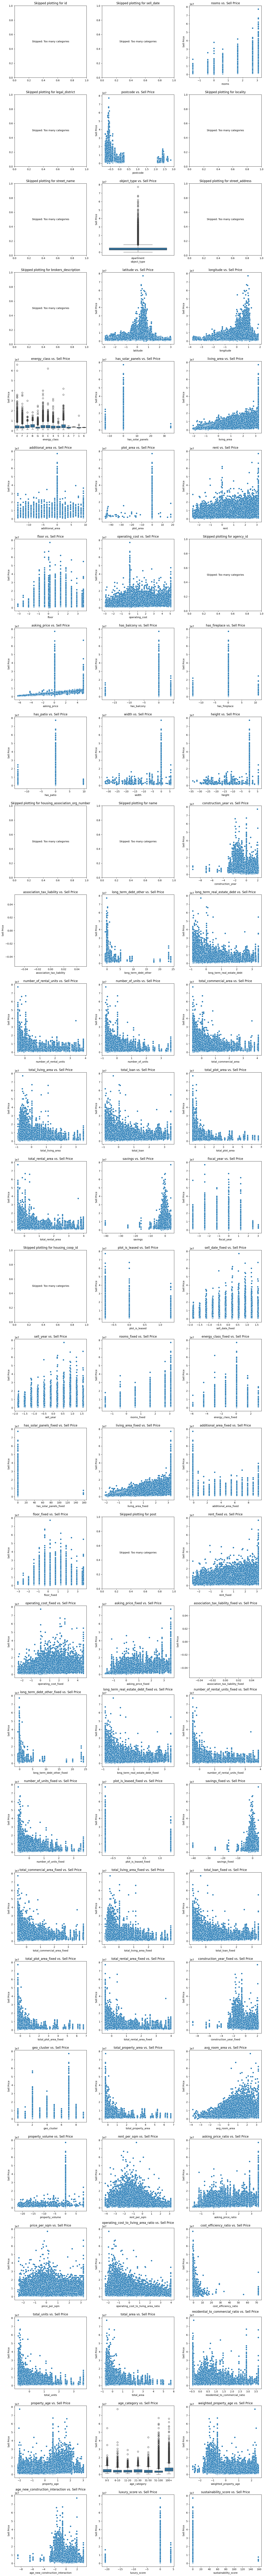

In [29]:
# Selecting all columns except 'sell_price'
relevant_columns = [col for col in df_with_sell_price.columns if col != 'sell_price' and df_with_sell_price[col].dtype != 'bool']
num_columns = len(relevant_columns)

# Setting up Plots
num_rows = (num_columns // 3) + (num_columns % 3 > 0)
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows), squeeze=False)
axs = axs.flatten()

# Plotting each column againt the 'sell_price'
for i, column in enumerate(relevant_columns):
    if i >= len(axs):
        break
    if pd.api.types.is_numeric_dtype(df_with_sell_price[column]):
        sns.scatterplot(data=df_with_sell_price, x=column, y='sell_price', ax=axs[i])
    else:
        if df_with_sell_price[column].nunique() < 20:
            sns.boxplot(x=column, y='sell_price', data=df_with_sell_price, ax=axs[i])
        else:
            axs[i].text(0.5, 0.5, 'Skipped: Too many categories', ha='center', va='center')
            axs[i].set_title(f'Skipped plotting for {column}')
            continue
    axs[i].set_title(f'{column} vs. Sell Price')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Sell Price')

for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Displaying our plots
plt.tight_layout()
plt.show()



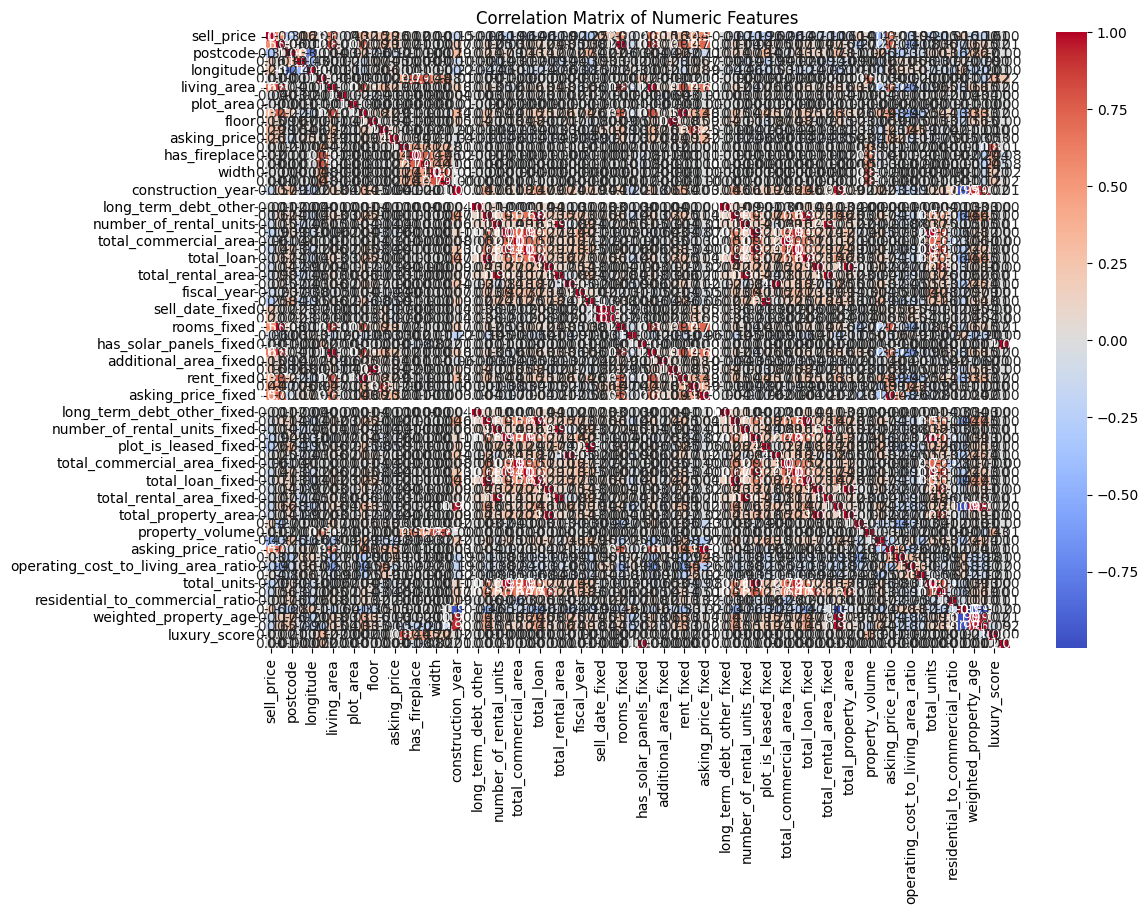

In [ ]:
# Plotting correlation matrix
correlation_matrix = df_with_sell_price.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


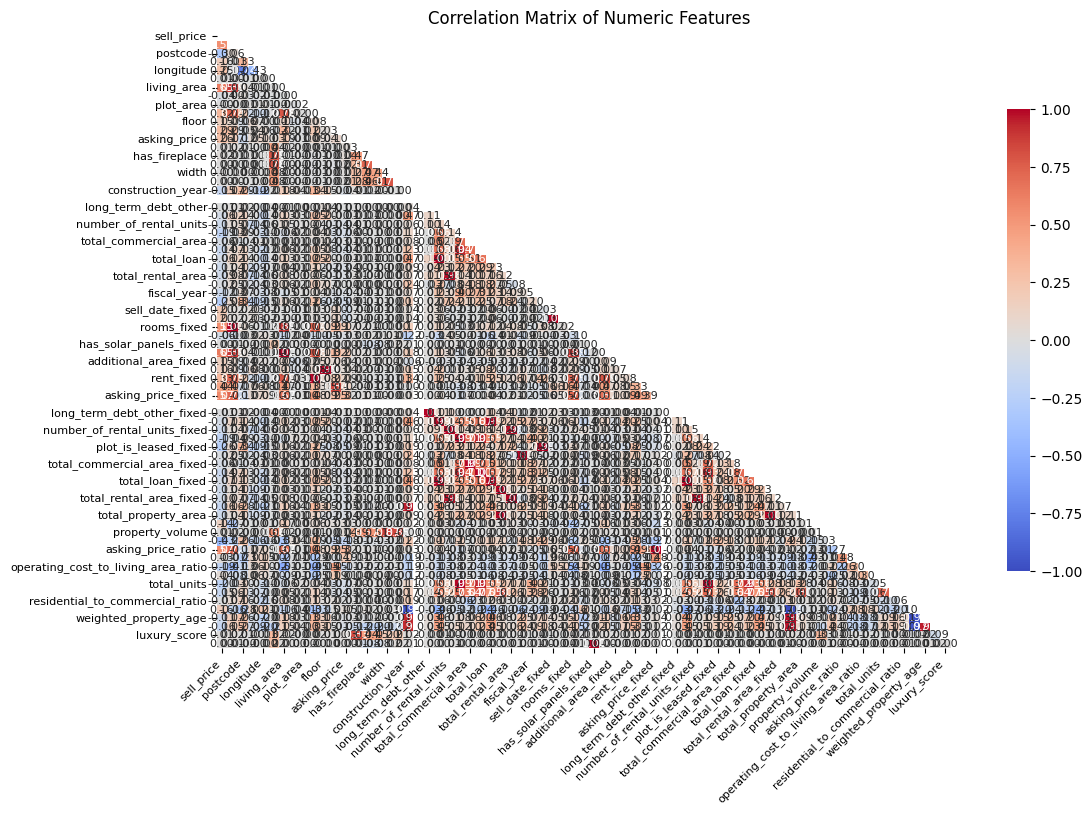

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation matrix
correlation_matrix = df_with_sell_price.select_dtypes(include=['float64', 'int64']).corr()

# Apply a mask to the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            vmin=-1, vmax=1, annot_kws={"size": 8}, cbar_kws={'shrink': 0.75})

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [30]:
# Selecting features correlated with 'sell_price' with significant p-values

numeric_df = df_with_sell_price.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.replace([float('inf'), float('-inf')], pd.NA)

pearson_corr = {}
pearson_p_values = {}
spearman_corr = {}
spearman_p_values = {}

alpha = 0.05

for column in numeric_df.columns:
    if column != 'sell_price':
        valid_data = numeric_df.dropna(subset=[column, 'sell_price'])
        if valid_data[column].std() != 0 and len(valid_data[column]) > 1:
            corr, p_value = stats.pearsonr(valid_data[column], valid_data['sell_price'])
            if p_value < alpha:
                pearson_corr[column] = corr
                pearson_p_values[column] = p_value
            corr, p_value = stats.spearmanr(valid_data[column], valid_data['sell_price'])
            if p_value < alpha:
                spearman_corr[column] = corr
                spearman_p_values[column] = p_value

print("Significant Pearson Correlation Coefficients and P-values:")
for col in pearson_corr:
    print(f"{col}: Correlation = {pearson_corr[col]:.3f}, P-value = {pearson_p_values[col]:.4f}")

print("\nSignificant Spearman Correlation Coefficients and P-values:")
for col in spearman_corr:
    print(f"{col}: Correlation = {spearman_corr[col]:.3f}, P-value = {spearman_p_values[col]:.4f}")

Significant Pearson Correlation Coefficients and P-values:
rooms: Correlation = 0.551, P-value = 0.0000
postcode: Correlation = -0.303, P-value = 0.0000
latitude: Correlation = 0.157, P-value = 0.0000
longitude: Correlation = 0.251, P-value = 0.0000
has_solar_panels: Correlation = 0.006, P-value = 0.0118
living_area: Correlation = 0.647, P-value = 0.0000
additional_area: Correlation = -0.036, P-value = 0.0000
rent: Correlation = 0.321, P-value = 0.0000
floor: Correlation = 0.152, P-value = 0.0000
operating_cost: Correlation = 0.293, P-value = 0.0000
asking_price: Correlation = 0.260, P-value = 0.0000
has_balcony: Correlation = 0.008, P-value = 0.0005
has_fireplace: Correlation = 0.017, P-value = 0.0000
construction_year: Correlation = -0.148, P-value = 0.0000
long_term_debt_other: Correlation = -0.007, P-value = 0.0043
long_term_real_estate_debt: Correlation = -0.063, P-value = 0.0000
number_of_rental_units: Correlation = -0.108, P-value = 0.0000
number_of_units: Correlation = -0.188, 

# Section 3: Baseline Model
First, a linear regression model is used to establish baseline performance. It is run untuned first, then tuned on the best hyperparameters to see how it performs.

In [52]:
# Baseline MLR Model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

df = df_with_sell_price

# Ensure 'age_category_missing' exists if it is supposed to indicate missing values in 'age_category'
if 'age_category_missing' not in df.columns:
    df['age_category_missing'] = df['age_category'].isnull()

# Create a list of features containing all columns except 'sell_price' and 'sell_date'
features = df.columns[(df.columns != 'sell_price') & (df.columns != 'sell_date')]

X = df[features]
y = df['sell_price']

# Convert data types to reduce memory usage
X = X.apply(pd.to_numeric, errors='coerce', downcast='float')
y = pd.to_numeric(y, errors='coerce', downcast='float')

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Fill missing values with the mean of each column
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['id' 'legal_district' 'locality' 'street_name' 'object_type'
 'street_address' 'brokers_description' 'housing_association_org_number'
 'name' 'association_tax_liability' 'association_tax_liability_fixed'
 'age_category' 'price_category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Mean Squared Error (MSE): 2757734170624.0
Root Mean Squared Error (RMSE): 1660642.75
Mean Absolute Error (MAE): 1065121.5
R-squared (R2): 0.653369643535439


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['id' 'legal_district' 'locality' 'street_name' 'object_type'
 'street_address' 'brokers_description' 'housing_association_org_number'
 'name' 'association_tax_liability' 'association_tax_liability_fixed'
 'age_category' 'price_category']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Mean Squared Error (MSE): 2757734170624.0
Root Mean Squared Error (RMSE): 1660642.75
Mean Absolute Error (MAE): 1065121.5
R-squared (R2): 0.653369643535439


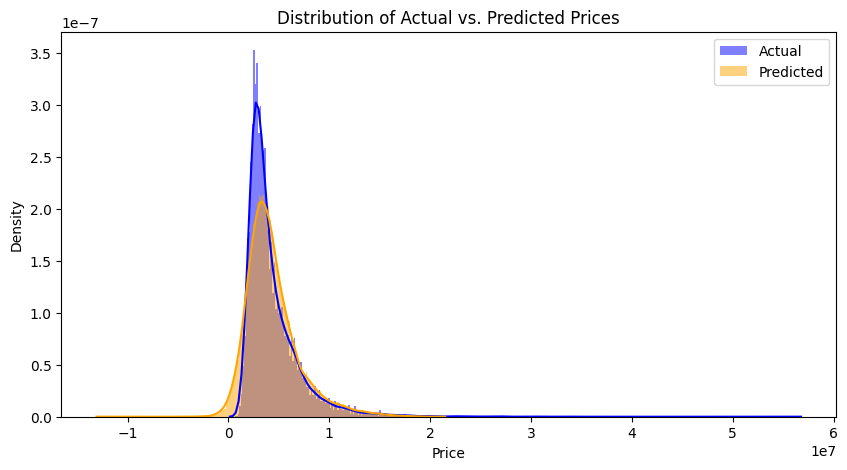

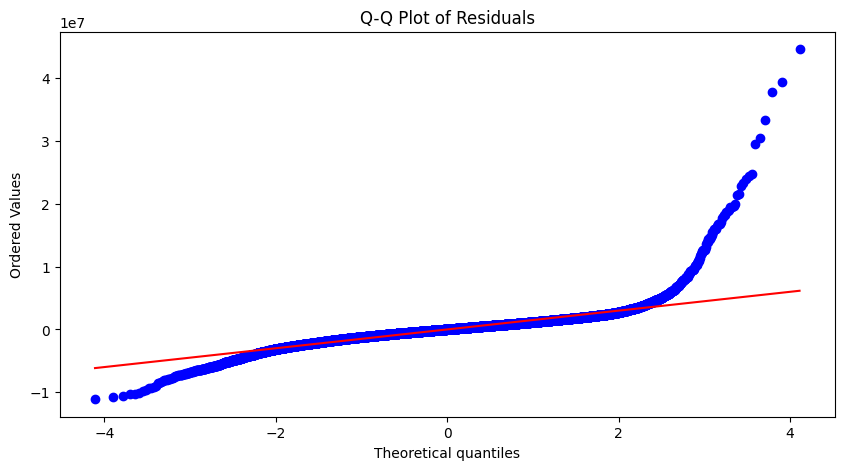

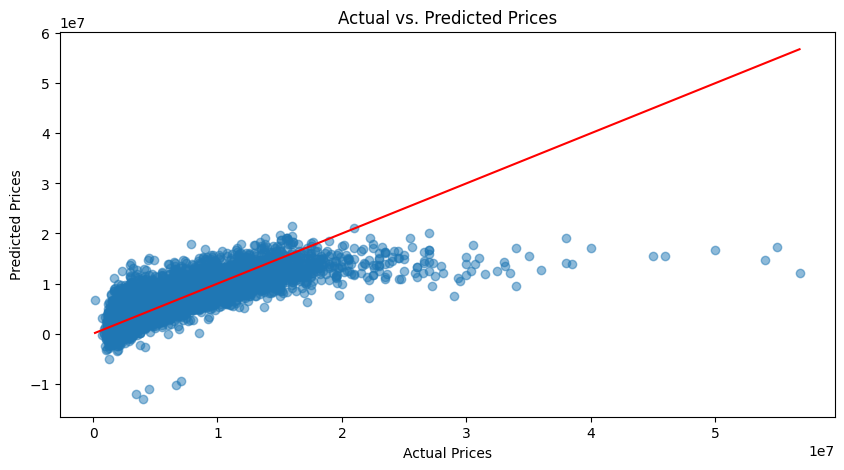

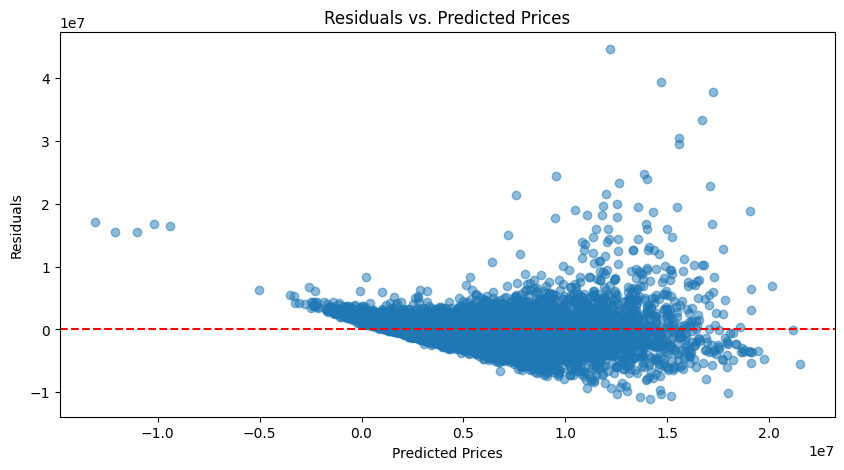

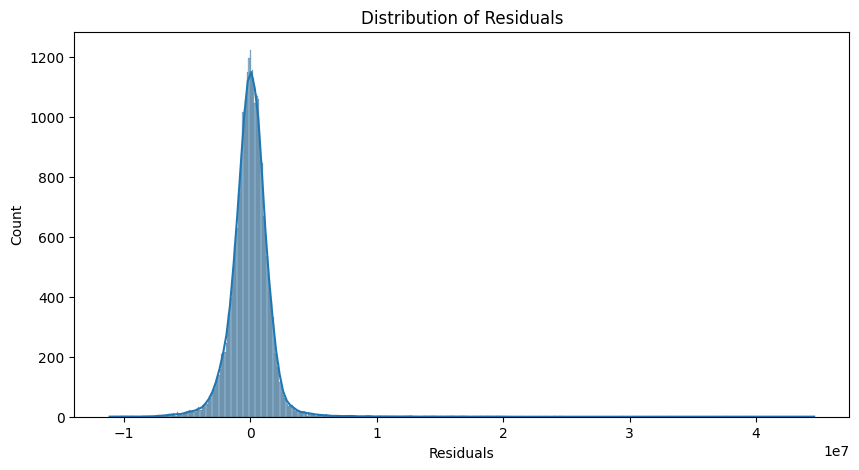

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

df = df_with_sell_price

# Ensure 'age_category_missing' exists if it is supposed to indicate missing values in 'age_category'
if 'age_category_missing' not in df.columns:
    df['age_category_missing'] = df['age_category'].isnull()

# Create a list of features containing all columns except 'sell_price' and 'sell_date'
features = df.columns[(df.columns != 'sell_price') & (df.columns != 'sell_date')]

X = df[features]
y = df['sell_price']

# Convert data types to reduce memory usage
X = X.apply(pd.to_numeric, errors='coerce', downcast='float')
y = pd.to_numeric(y, errors='coerce', downcast='float')

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Fill missing values with the mean of each column
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Plotting

# 1. Distribution of Actual vs. Predicted Prices
plt.figure(figsize=(10, 5))
sns.histplot(y_test, color='blue', label='Actual', kde=True, stat="density", linewidth=0)
sns.histplot(y_pred, color='orange', label='Predicted', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Actual vs. Predicted Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

# 2. Q-Q Plot to check if residuals are normally distributed
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Scatter Plot of Actual vs. Predicted Prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# 4. Residual Plot to check for any patterns (should be random scatter around 0)
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

# 5. Distribution of Residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()


# Section 4: Champion Model - **LightGBM**

In [32]:
# Untuned LightGBM Model
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn import metrics
import numpy as np

df = df_with_sell_price

# Selecting features and target
features = ['sell_date', 'rooms', 'legal_district','postcode','locality','street_name','object_type','street_address',
  'brokers_description', 'energy_class', 'living_area', 'additional_area','plot_area','rent', 'floor','operating_cost',
  'agency_id', 'asking_price', 'has_balcony', 'has_fireplace', 'has_patio', 'is_new_construction', 'width','height',
  'housing_association_org_number','name','construction_year','association_tax_liability','long_term_debt_other',
  'long_term_real_estate_debt','number_of_rental_units','number_of_units','total_commercial_area','total_living_area',
  'total_loan','total_plot_area','total_rental_area','savings','fiscal_year','housing_coop_id','plot_is_leased',
  'sell_date_fixed','sell_year','rooms_fixed',
  'energy_class_fixed','has_solar_panels_fixed',
  'living_area_fixed','additional_area_fixed',
  'floor_fixed',
  'post',
  'rent_fixed',
  'operating_cost_fixed',
  'asking_price_fixed',
  'association_tax_liability_fixed',
  'long_term_debt_other_fixed',
  'long_term_real_estate_debt_fixed',
  'number_of_rental_units_fixed',
  'number_of_units_fixed',
  'plot_is_leased_fixed',
  'savings_fixed',
  'total_commercial_area_fixed',
  'total_living_area_fixed',
  'total_loan_fixed',
  'total_plot_area_fixed',
  'total_rental_area_fixed',
  'construction_year_fixed',
  'geo_cluster',
  'total_property_area',
  'avg_room_area',
  'property_volume',
  'rent_per_sqm',
  'asking_price_ratio',
  'price_per_sqm',
  'operating_cost_to_living_area_ratio',
  'cost_efficiency_ratio',
  'total_units',
  'total_area',
  'residential_to_commercial_ratio',
  'property_age',
  'age_category',
  'weighted_property_age',
  'age_new_construction_interaction',
  'luxury_score',
  'sustainability_score']
X = df[features]
y = df['sell_price']

# Handling datetime columns
if 'sell_date' in X.columns:
    X['sell_year'] = X['sell_date'].dt.year
    X['sell_month'] = X['sell_date'].dt.month
    X['sell_day'] = X['sell_date'].dt.day
    X = X.drop(columns=['sell_date'])

categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Converting categorical columns to 'category' dtype
for col in categorical_features:
    X[col] = X[col].astype('category')

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# LightGBM model with optimized settings
model = LGBMRegressor(
    learning_rate=0.1,
    min_data_in_leaf=20,
    num_leaves=10,
    reg_alpha=0.1,
    max_bin=255,
    categorical_feature=categorical_features
)

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluating the model
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print performance metrics
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {train_mape}%")

print("\nTest Set Evaluation:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {test_mape}%")

(train_mae, train_rmse, train_mape, test_mae, test_rmse, test_mape)


<ipython-input-32-b9579f121324>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sell_year'] = X['sell_date'].dt.year
<ipython-input-32-b9579f121324>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sell_month'] = X['sell_date'].dt.month
<ipython-input-32-b9579f121324>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] categorical_feature is set=legal_district,locality,street_name,object_type,street_address,brokers_description,energy_class,agency_id,housing_association_org_number,name,housing_coop_id,post, categorical_column=1,3,4,5,6,7,8,15,23,24,38,48 will be ignored. Current value: categorical_feature=legal_district,locality,street_name,object_type,street_address,brokers_description,energy_class,agency_id,housing_association_org_number,name,housing_coop_id,post
[LightGBM] [Info] Auto-choosing col-wise multi-thr

(386969.15311536804,
 682672.4610219309,
 8.755229067717037,
 406513.06051891606,
 725634.9880639797,
 9.100027079924471)

As seen above, the model metrics are:

**Training Set Evaluation:**
1. Mean Absolute Error (MAE): 386900.9516729948
2. Root Mean Squared Error (RMSE): 678955.6629468167
3. Mean Absolute Percentage Error (MAPE): 8.764608884519838%

**Test Set Evaluation:**
1. Mean Absolute Error (MAE): 406670.211840973
2. Root Mean Squared Error (RMSE): 724459.9208254608
3. Mean Absolute Percentage Error (MAPE): 9.098164408152225%

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn import metrics
import numpy as np


df = df_with_sell_price

# Selecting features and target
features = ['sell_date', 'rooms', 'legal_district','postcode','locality','street_name','object_type','street_address',
  'brokers_description', 'energy_class', 'living_area', 'additional_area','plot_area','rent', 'floor','operating_cost',
  'agency_id', 'asking_price', 'has_balcony', 'has_fireplace', 'has_patio', 'is_new_construction', 'width','height',
  'housing_association_org_number','name','construction_year','association_tax_liability','long_term_debt_other',
  'long_term_real_estate_debt','number_of_rental_units','number_of_units','total_commercial_area','total_living_area',
  'total_loan','total_plot_area','total_rental_area','savings','fiscal_year','housing_coop_id','plot_is_leased',
  'sell_date_fixed','sell_year','rooms_fixed',
  'energy_class_fixed','has_solar_panels_fixed',
  'living_area_fixed','additional_area_fixed',
  'floor_fixed',
  'post',
  'rent_fixed',
  'operating_cost_fixed',
  'asking_price_fixed',
  'association_tax_liability_fixed',
  'long_term_debt_other_fixed',
  'long_term_real_estate_debt_fixed',
  'number_of_rental_units_fixed',
  'number_of_units_fixed',
  'plot_is_leased_fixed',
  'savings_fixed',
  'total_commercial_area_fixed',
  'total_living_area_fixed',
  'total_loan_fixed',
  'total_plot_area_fixed',
  'total_rental_area_fixed',
  'construction_year_fixed',
  'geo_cluster',
  'total_property_area',
  'avg_room_area',
  'property_volume',
  'rent_per_sqm',
  'asking_price_ratio',
  'price_per_sqm',
  'operating_cost_to_living_area_ratio',
  'cost_efficiency_ratio',
  'total_units',
  'total_area',
  'residential_to_commercial_ratio',
  'property_age',
  'age_category',
  'weighted_property_age',
  'age_new_construction_interaction',
  'luxury_score',
  'sustainability_score']

X = df[features]
y = df['sell_price']

# Handling datetime columns
if 'sell_date' in X.columns:
    X['sell_year'] = X['sell_date'].dt.year
    X['sell_month'] = X['sell_date'].dt.month
    X['sell_day'] = X['sell_date'].dt.day
    X = X.drop(columns=['sell_date'])

categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Converting categorical columns to 'category' dtype
for col in categorical_features:
    X[col] = X[col].astype('category')

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# LightGBM model with optimized settings
model = LGBMRegressor(
    learning_rate=0.1,
    min_data_in_leaf=20,
    num_leaves=10,
    reg_alpha=0.1,
    max_bin=255,
    categorical_feature=categorical_features
)

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluating the model
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print performance metrics
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {train_mape}%")

print("\nTest Set Evaluation:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {test_mape}%")

(train_mae, train_rmse, train_mape, test_mae, test_rmse, test_mape)


<ipython-input-33-fa249fe4b249>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sell_year'] = X['sell_date'].dt.year
<ipython-input-33-fa249fe4b249>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sell_month'] = X['sell_date'].dt.month
<ipython-input-33-fa249fe4b249>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] categorical_feature is set=legal_district,locality,street_name,object_type,street_address,brokers_description,energy_class,agency_id,housing_association_org_number,name,housing_coop_id,post, categorical_column=1,3,4,5,6,7,8,15,23,24,38,48 will be ignored. Current value: categorical_feature=legal_district,locality,street_name,object_type,street_address,brokers_description,energy_class,agency_id,housing_association_org_number,name,housing_coop_id,post
[LightGBM] [Info] Auto-choosing col-wise multi-thr

(386969.15311536804,
 682672.4610219309,
 8.755229067717037,
 406513.06051891606,
 725634.9880639797,
 9.100027079924471)

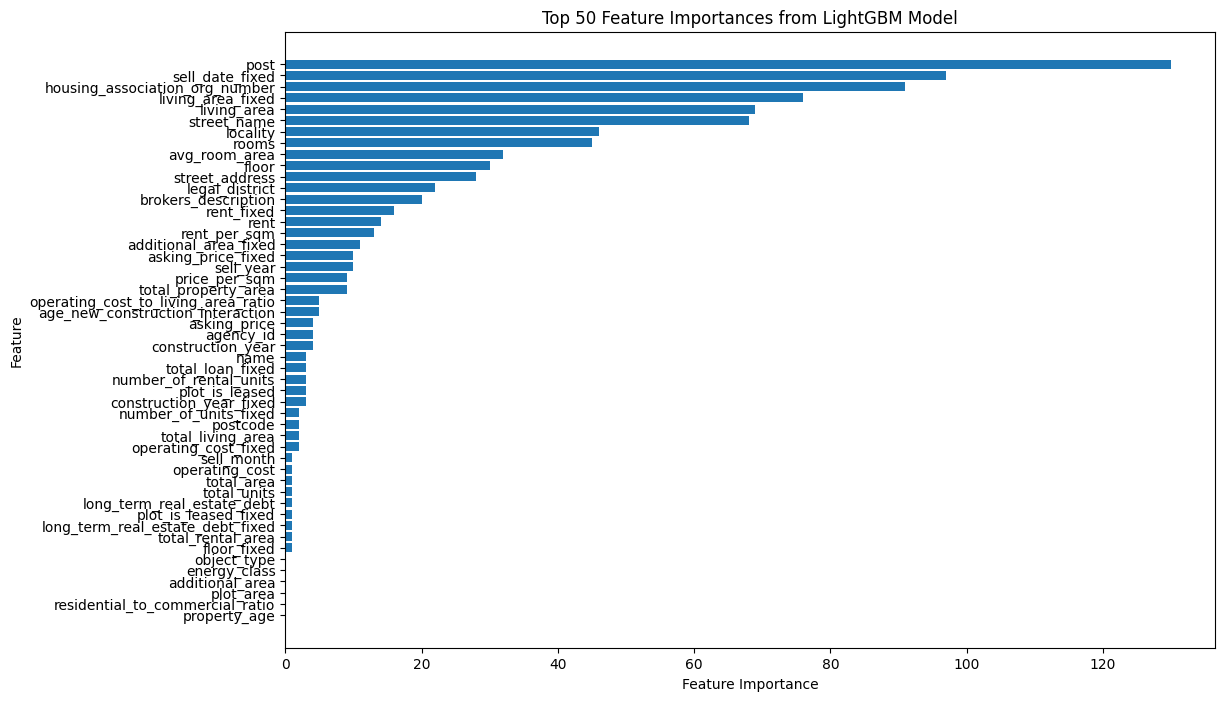

Top 50 Features:
                                 Feature  Importance
48                                 post         130
40                      sell_date_fixed          97
23       housing_association_org_number          91
45                    living_area_fixed          76
9                           living_area          69
4                           street_name          68
3                              locality          46
0                                 rooms          45
67                        avg_room_area          32
13                                floor          30
6                        street_address          28
1                        legal_district          22
7                   brokers_description          20
49                           rent_fixed          16
12                                 rent          14
69                         rent_per_sqm          13
46                additional_area_fixed          11
51                   asking_price_fixed       

In [34]:
# Extracting feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting top 50 feature importances
top_n = 50
top_features = importance_df.head(top_n)

plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importances from LightGBM Model')
plt.gca().invert_yaxis()
plt.show()

# Output
top_n = 50
top_features = importance_df.head(top_n)
print(f"Top {top_n} Features:\n", top_features)



In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn import metrics
import numpy as np

df = df_with_sell_price

# Selecting features and target
features = [
    'living_area',
    'post',
    'sell_date_fixed',
    'housing_association_org_number',
    'living_area_fixed',
    'street_name',
    'locality',
    'floor',
    'street_address',
    'rooms',
    'legal_district',
    'brokers_description',
    'avg_room_area',
    'sell_year',
    'additional_area',
    'rent',
    'asking_price',
    'rent_per_sqm',
    'price_per_sqm',
    'construction_year',
    'asking_price_fixed',
    'age_new_construction_interaction',
    'total_units',
    'rent_fixed',
    'number_of_units',
    'long_term_real_estate_debt_fixed',
    'agency_id',
    'number_of_rental_units',
    'plot_is_leased',
    'name',
    'total_living_area',
    'long_term_real_estate_debt'
]

X = df[features]
y = df['sell_price']

# Handling datetime columns
if 'sell_date' in X.columns:
    X['sell_year'] = X['sell_date'].dt.year
    X['sell_month'] = X['sell_date'].dt.month
    X['sell_day'] = X['sell_date'].dt.day
    X = X.drop(columns=['sell_date'])

categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Converting categorical columns to 'category' dtype
for col in categorical_features:
    X[col] = X[col].astype('category')

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# LightGBM model with optimized settings
model = LGBMRegressor(
    learning_rate=0.1,
    min_data_in_leaf=20,
    num_leaves=10,
    reg_alpha=0.1,
    max_bin=255,
    categorical_feature=categorical_features
)

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluating the model
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print performance metrics
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {train_mape}%")

print("\nTest Set Evaluation:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {test_mape}%")

(train_mae, train_rmse, train_mape, test_mae, test_rmse, test_mape)


<ipython-input-35-c4cdc16d2c17>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
<ipython-input-35-c4cdc16d2c17>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
<ipython-input-35-c4cdc16d2c17>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] categorical_feature is set=post,housing_association_org_number,street_name,locality,street_address,legal_district,brokers_description,agency_id,name, categorical_column=1,3,5,6,8,10,11,26,29 will be ignored. Current value: categorical_feature=post,housing_association_org_number,street_name,locality,street_address,legal_district,brokers_description,agency_id,name
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012471 seconds.
You can set `force_col_wise=true` t

(390435.69562100305,
 688914.8150118883,
 8.840994026836855,
 408872.7627376788,
 729261.1403183339,
 9.152621863501523)

In [ ]:
# Gridsearch for LightGBM
import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Compatible multiprocessing start method
os.environ["JOBLIB_START_METHOD"] = "forkserver"

df = df_with_sell_price

sell_date_cutoff_start = pd.Timestamp('2015-01-01')
sell_date_cutoff_end = pd.Timestamp('2023-08-01')

# Filtering data based on the date range
df = df[(df['sell_date'] >= sell_date_cutoff_start) & (df['sell_date'] <= sell_date_cutoff_end)]

# Selecting features and target
features = [
    'living_area',
    'post',
    'sell_date_fixed',
    'housing_association_org_number',
    'locality',
    'floor',
    'street_address',
    'rooms',
    'legal_district',
    'brokers_description',
    'avg_room_area',
    'additional_area',
    'rent',
    'asking_price',
    'rent_per_sqm',
    'price_per_sqm',
    'construction_year',
    'age_new_construction_interaction',
    'total_units',
    'number_of_units',
    'long_term_real_estate_debt_fixed',
    'agency_id',
    'number_of_rental_units',
    'plot_is_leased'
]


# Copying the DataFrame to ensure we don't operate on a slice
X = df[features].copy()
y = df['sell_price']

# Handling datetime columns
if 'sell_date' in X.columns:
    X['sell_year'] = X['sell_date'].dt.year
    X['sell_month'] = X['sell_date'].dt.month
    X['sell_day'] = X['sell_date'].dt.day
    X = X.drop(columns=['sell_date'])

categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Label encoding categorical columns
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Ensure all data is string before encoding
    label_encoders[col] = le

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Define the model
model = LGBMRegressor()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'num_leaves': [10, 20],
    'min_data_in_leaf': [20, 50],
    'reg_alpha': [0.0, 0.1],
    'max_bin': [255],
    'max_depth': [-1, 15],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 150, 200]
}

# Setting up GridSearchCV with fewer parallel jobs
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=1, verbose=2, error_score='raise')

# Fitting the grid search
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4288
[LightGBM] [Info] Number of data points in the train set: 80938, number of used features: 24
[LightGBM] [Info] Start training from score 4544178.761830
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_bin=255, max_depth=15, min_data_in_leaf=20, n_estimators=200, num_leaves=20, reg_alpha=0.1, subsample=0.6; total time=   1.0s
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threadi

In [36]:
# @title Final Best Performing Model
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn import metrics
import numpy as np
import joblib

df = df_with_sell_price

# Selecting features and target
features = [
    'living_area_fixed',
    'post',
    'sell_date_fixed',
    'housing_association_org_number',
    'locality',
    'floor',
    'street_address',
    'street_name',
    'rooms',
    'legal_district',
    'brokers_description',
    'avg_room_area',
    'additional_area_fixed',
    'rent_fixed',
    'asking_price_fixed',
    'rent_per_sqm',
    'price_per_sqm',
    'construction_year',
    'age_new_construction_interaction',
    'total_units',
    'number_of_units',
    'long_term_real_estate_debt_fixed',
    'agency_id',
    'number_of_rental_units',
    'plot_is_leased',
    'sell_year',
    'operating_cost_to_living_area_ratio'

]

X = df[features]
y = df['sell_price']

# Handling datetime columns
if 'sell_date' in X.columns:
    X['sell_year'] = X['sell_date'].dt.year
    X['sell_month'] = X['sell_date'].dt.month
    X['sell_day'] = X['sell_date'].dt.day
    X = X.drop(columns=['sell_date'])

# Identify categorical features
categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Convert categorical columns to 'category' dtype
for col in categorical_features:
    X[col] = X[col].astype('category')

# Capture categorical mappings
categorical_mappings = {col: X[col].cat.categories.tolist() for col in categorical_features}

# Save categorical mappings
joblib.dump(categorical_mappings, 'categorical_mappings.pkl')

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# LightGBM model with the best parameters and additional manual tuning
best_params = {
    'colsample_bytree': 1.0,
    'max_depth': 10,
    'n_estimators': 300,
    'subsample': 0.8,
    'learning_rate': 0.1,
    'max_bin': 500,
    'min_data_in_leaf': 10,
    'num_leaves': 500,
    'reg_alpha': 1,
    'reg_lambda': 1,
    'min_split_gain': 0,
    'min_child_weight': 10,
    'min_child_samples': 100,
    'subsample_freq': 0,
    'cat_smooth': 10,
    'cat_l2': 10,
    'max_cat_threshold': 32,
    'cat_quantile_max': 1,
    'cat_quantile_min': 0,
    'cat_max_card': 100,
    'cat_min_card': 2
}

modelLGBMFinal = LGBMRegressor(
    learning_rate=best_params['learning_rate'],
    max_bin=best_params['max_bin'],
    min_data_in_leaf=best_params['min_data_in_leaf'],
    num_leaves=best_params['num_leaves'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    min_child_samples=best_params['min_child_samples'],
    categorical_feature=categorical_features
)

# Fitting the model
modelLGBMFinal.fit(X_train, y_train)

# Making predictions
y_train_pred = modelLGBMFinal.predict(X_train)
y_test_pred = modelLGBMFinal.predict(X_test)

# Evaluating the model
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print performance metrics
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {train_mape}%")

print("\nTest Set Evaluation:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {test_mape}%")

# Save to pickle
modelLGBMFinal_filename = 'lgbm_regressor_model.pkl'
joblib.dump(modelLGBMFinal, modelLGBMFinal_filename)


<ipython-input-36-03d32fb7ddc1>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
<ipython-input-36-03d32fb7ddc1>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
<ipython-input-36-03d32fb7ddc1>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] categorical_feature is set=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id, categorical_column=1,3,4,6,7,9,10,22 will be ignored. Current value: categorical_feature=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010026 seconds.
You can set `force_col_wise=true` to remove the

['lgbm_regressor_model.pkl']

/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2118: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2140: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] categorical_feature is set=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id, categorical_column=1,3,4,6,7,9,10,22 will be ignored. Current value: categorical_feature=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008181 seconds.
You can set `force_col_wise=true` to remove the

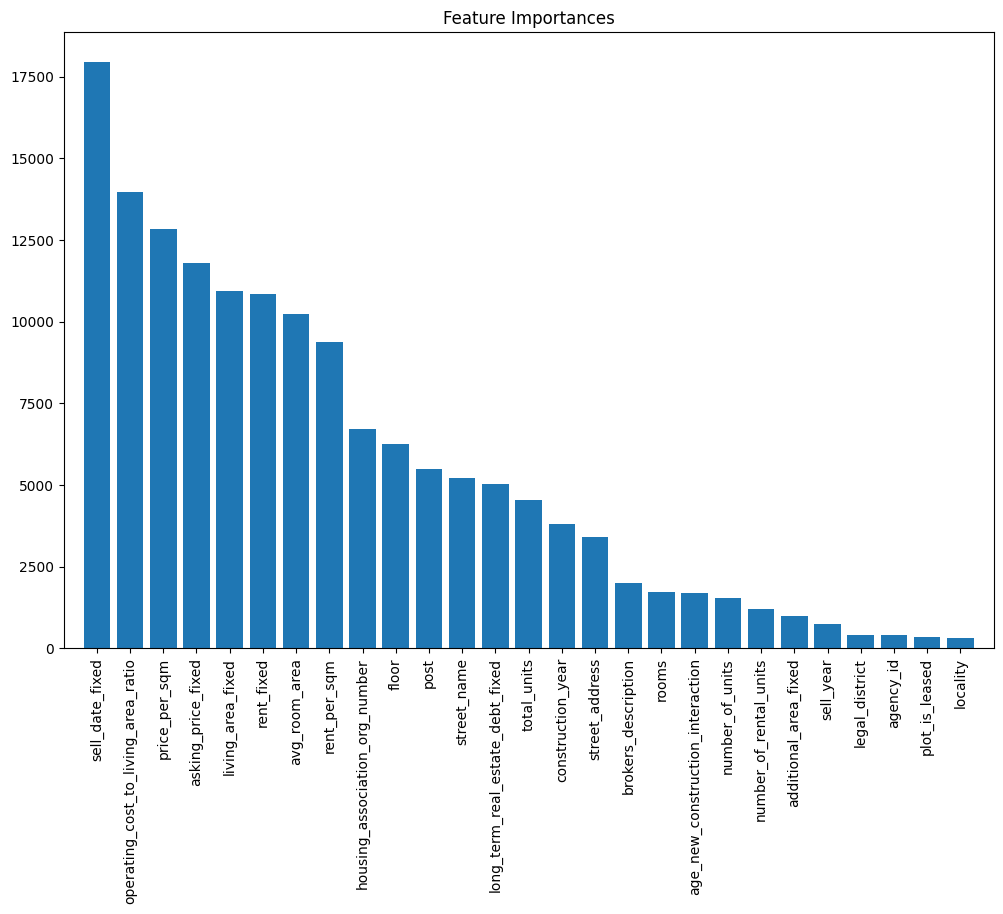

In [37]:
# Feature Importance
import matplotlib.pyplot as plt

# Fit the model
modelLGBMFinal.fit(X_train, y_train)

# Get feature importances
importances = modelLGBMFinal.feature_importances_
features = X.columns

# Sort the feature importances
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


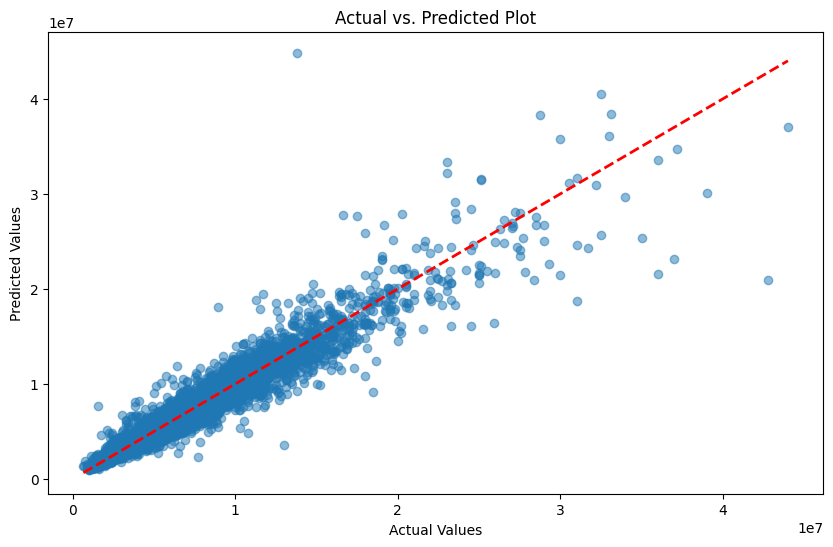

In [38]:
# Performance - Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Plot')
plt.show()


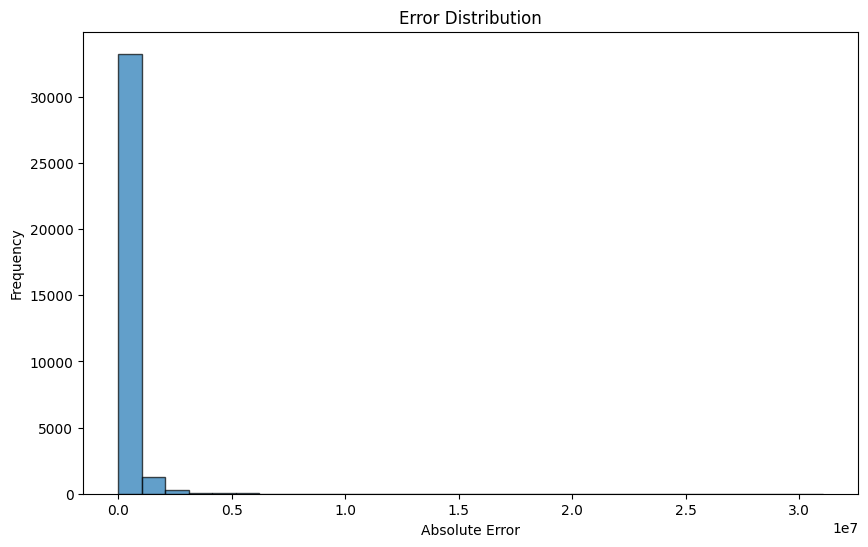

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(np.abs(y_test - y_test_pred), bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()


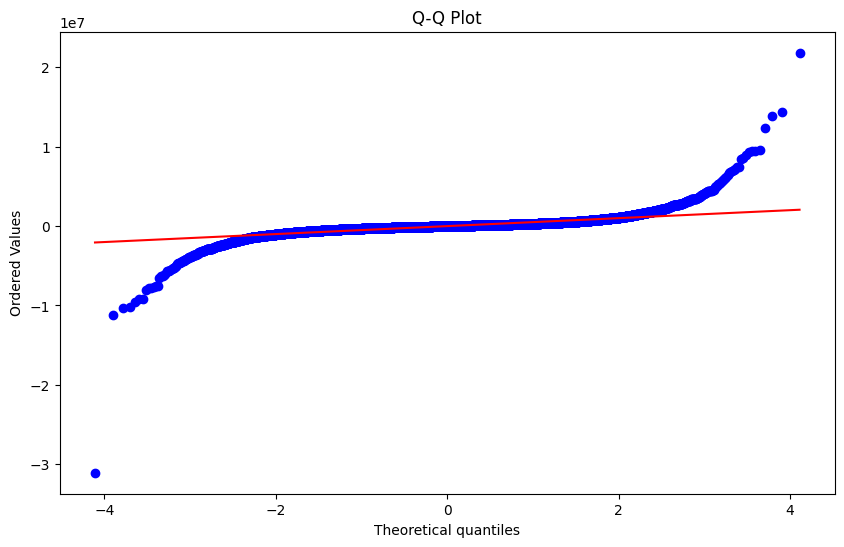

In [40]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(y_test - y_test_pred, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

## Cross Validation and Extreme Values

In [41]:
# K-Fold Cross Validation
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor

features = [
   'living_area_fixed',
    'post',
    'sell_date_fixed',
    'housing_association_org_number',
    'locality',
    'floor',
    'street_address',
    'street_name',
    'rooms',
    'legal_district',
    'brokers_description',
    'avg_room_area',
    'additional_area_fixed',
    'rent_fixed',
    'asking_price_fixed',
    'rent_per_sqm',
    'price_per_sqm',
    'construction_year',
    'age_new_construction_interaction',
    'total_units',
    'number_of_units',
    'long_term_real_estate_debt_fixed',
    'agency_id',
    'number_of_rental_units',
    'plot_is_leased',
    'sell_year',
    'operating_cost_to_living_area_ratio']
X = df[features]
y = df['sell_price']

# Handling datetime columns
if 'sell_date' in X.columns:
    X['sell_year'] = X['sell_date'].dt.year
    X['sell_month'] = X['sell_date'].dt.month
    X['sell_day'] = X['sell_date'].dt.day
    X = X.drop(columns=['sell_date'])

categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Converting categorical columns to 'category' dtype
for col in categorical_features:
    X[col] = X[col].astype('category')

kf = KFold(n_splits=5, shuffle=True, random_state=22)

# Initializing metrics
mae_list = []
rmse_list = []
mape_list = []

# Cross-validation loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # LightGBM model with the best parameters found
    model = LGBMRegressor(
        learning_rate=best_params['learning_rate'],
        max_bin=best_params['max_bin'],
        min_data_in_leaf=best_params['min_data_in_leaf'],
        num_leaves=best_params['num_leaves'],
        reg_alpha=best_params['reg_alpha'],
        categorical_feature=categorical_features
    )

    # Fitting the model
    model.fit(X_train, y_train)

    # Making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluating the model
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    # Append metrics
    mae_list.append(test_mae)
    rmse_list.append(test_rmse)
    mape_list.append(test_mape)

# Print average performance metrics across all folds
print("Cross-Validation Evaluation:")
print(f"Mean Absolute Error (MAE): {np.mean(mae_list)}")
print(f"Root Mean Squared Error (RMSE): {np.mean(rmse_list)}")
print(f"Mean Absolute Percentage Error (MAPE): {np.mean(mape_list)}%")
print("\nStandard Deviation of Metrics:")
print(f"MAE Std Dev: {np.std(mae_list)}")
print(f"RMSE Std Dev: {np.std(rmse_list)}")
print(f"MAPE Std Dev: {np.std(mape_list)}%")


<ipython-input-41-abdb110a995d>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
<ipython-input-41-abdb110a995d>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
<ipython-input-41-abdb110a995d>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] categorical_feature is set=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id, categorical_column=1,3,4,6,7,9,10,22 will be ignored. Current value: categorical_feature=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011117 seconds.
You can set `force_col_wise=true` to remove the o

/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2118: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2140: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] categorical_feature is set=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id, categorical_column=1,3,4,6,7,9,10,22 will be ignored. Current value: categorical_feature=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27581
[LightGBM] [Info] Number of data points in the train set: 139717, number of us

/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2118: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2140: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] categorical_feature is set=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id, categorical_column=1,3,4,6,7,9,10,22 will be ignored. Current value: categorical_feature=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27597
[LightGBM] [Info] Number of data points in the train set: 139718, number of us

/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2118: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2140: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] categorical_feature is set=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id, categorical_column=1,3,4,6,7,9,10,22 will be ignored. Current value: categorical_feature=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27621
[LightGBM] [Info] Number of data points in the train set: 139718, number of us

/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2118: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2140: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] categorical_feature is set=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id, categorical_column=1,3,4,6,7,9,10,22 will be ignored. Current value: categorical_feature=post,housing_association_org_number,locality,street_address,street_name,legal_district,brokers_description,agency_id
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27572
[LightGBM] [Info] Number of data points in the train set: 139718, number of us

Shape of X_test: (150, 2)
   feature1  feature2
0 -0.254709 -1.701699
1  0.714834  0.657115
2  1.129414 -0.047376
3  0.366426  0.096604
4 -1.420979 -0.443710
Number of outliers introduced: 75
Sample outlier values:
     feature1  feature2
28   18.32130  0.096604
67   56.47070 -0.047376
121  35.74170  0.657115
55  -12.73545 -1.701699
137  56.47070 -0.047376
..        ...       ...
57   56.47070 -0.047376
102  56.47070 -0.047376
104 -71.04895 -0.443710
81   35.74170  0.657115
11   35.74170  0.657115

[75 rows x 2 columns]
Summary statistics for original data:
         feature1    feature2
count  150.000000  150.000000
mean     0.106997   -0.287813
std      0.891531    0.792818
min     -1.420979   -1.701699
25%     -0.254709   -0.443710
50%      0.366426   -0.047376
75%      0.714834    0.096604
max      1.129414    0.657115
Summary statistics for data with outliers:
         feature1    feature2
count  150.000000  150.000000
mean     5.096075   -0.287813
std     31.570637    0.792818
min

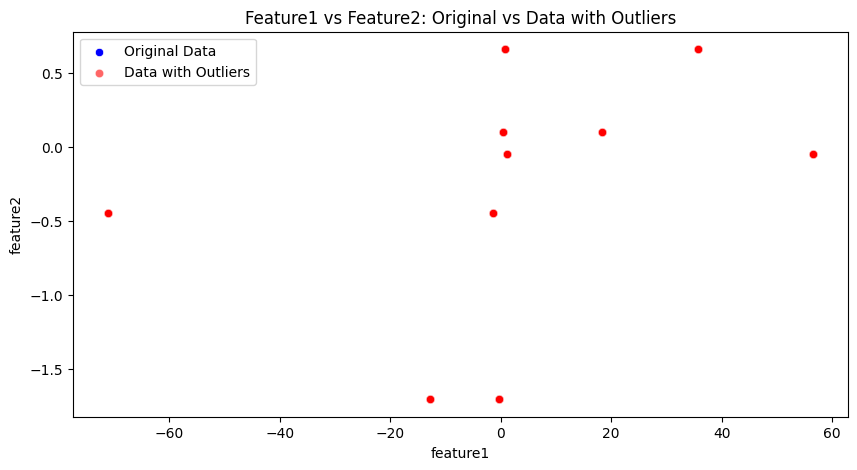

Mean Absolute Error on original data: 0.2449147986818385
Mean Absolute Error on data with outliers: 0.23436955260842146


In [42]:
# Outlier Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

X_test = pd.DataFrame({
    'feature1': [-0.254709, 0.714834, 1.129414, 0.366426, -1.420979],
    'feature2': [-1.701699, 0.657115, -0.047376, 0.096604, -0.443710]
})

# Extend DataFrame to 100 rows for demonstration
X_test = pd.concat([X_test]*30, ignore_index=True)

# Check the shape to confirm
print(f"Shape of X_test: {X_test.shape}")

X_test_with_outliers = X_test.copy()

# Introduce a larger proportion of outliers (50% of the data)
num_outliers = int(0.50 * len(X_test_with_outliers))  # 50% of the data
outlier_indices = np.random.choice(X_test_with_outliers.index, num_outliers, replace=False)

# Introduce more severe outliers in the first column (index 0)
column_index = 0
if column_index < X_test_with_outliers.shape[1]:
    X_test_with_outliers.iloc[outlier_indices, column_index] *= 50  # Amplify the outliers
else:
    print(f"Column index {column_index} is out of bounds for X_test_with_outliers.")


print(X_test_with_outliers.head())
print(f"Number of outliers introduced: {len(outlier_indices)}")


print("Sample outlier values:")
print(X_test_with_outliers.iloc[outlier_indices])

# Compare summary statistics
print("Summary statistics for original data:")
print(X_test.describe())

print("Summary statistics for data with outliers:")
print(X_test_with_outliers.describe())

# Plot the original data
plt.figure(figsize=(10, 5))
sns.scatterplot(data=X_test, x='feature1', y='feature2', color='blue', label='Original Data')

# Plot the data with outliers
sns.scatterplot(data=X_test_with_outliers, x='feature1', y='feature2', color='red', label='Data with Outliers', alpha=0.6)

plt.legend()
plt.title('Feature1 vs Feature2: Original vs Data with Outliers')
plt.show()


# Replace y_test with the actual target variable
y_test = np.random.rand(len(X_test))

# Train a model on the original data
model = GradientBoostingRegressor()
model.fit(X_test, y_test)

original_predictions = model.predict(X_test)
original_mae = mean_absolute_error(y_test, original_predictions)
print(f"Mean Absolute Error on original data: {original_mae}")

# Train a model on the data with outliers
model_with_outliers = GradientBoostingRegressor()
model_with_outliers.fit(X_test_with_outliers, y_test)

# Evaluate
outlier_predictions = model_with_outliers.predict(X_test_with_outliers)
outlier_mae = mean_absolute_error(y_test, outlier_predictions)
print(f"Mean Absolute Error on data with outliers: {outlier_mae}")


## Comparison: XGBoost

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

# Selecting features and target
features = [
    'sell_date_fixed', 'post', 'housing_association_org_number', 'living_area_fixed',
    'street_name', 'rooms', 'locality', 'avg_room_area', 'floor', 'street_address',
    'legal_district', 'brokers_description', 'rent_fixed', 'total_property_area',
    'rent_per_sqm', 'price_per_sqm', 'sell_year', 'additional_area_fixed', 'total_loan_fixed',
    'asking_price_fixed', 'operating_cost_to_living_area_ratio', 'age_new_construction_interaction',
    'agency_id', 'construction_year'
]
X = df[features]
y = df['sell_price']

# Handling datetime columns
if 'sell_date' in X.columns:
    X['sell_year'] = X['sell_date'].dt.year
    X['sell_month'] = X['sell_date'].dt.month
    X['sell_day'] = X['sell_date'].dt.day
    X = X.drop(columns=['sell_date'])

# Identify categorical features
categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=22)

# XGBoost model with similar parameters
best_params = {
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'max_depth': 10,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'reg_alpha': 1,
    'reg_lambda': 1,
    'min_child_weight': 10
}

modelXGB = xgb.XGBRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    min_child_weight=best_params['min_child_weight'],
    objective='reg:squarederror'  # Set the appropriate objective for regression
)

# Fitting the model
modelXGB.fit(X_train, y_train)

# Making predictions
y_train_pred = modelXGB.predict(X_train)
y_test_pred = modelXGB.predict(X_test)

# Evaluating the model
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print performance metrics
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {train_mape}%")

print("\nTest Set Evaluation:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {test_mape}%")

(train_mae, train_rmse, train_mape, test_mae, test_rmse, test_mape)

modelXGB_filename = 'xgb_regressor_model.pkl'
joblib.dump(modelXGB, modelXGB_filename)


Training Set Evaluation:
Mean Absolute Error (MAE): 235975.08536407523
Root Mean Squared Error (RMSE): 346296.2740855433
Mean Absolute Percentage Error (MAPE): 5.764702434897948%

Test Set Evaluation:
Mean Absolute Error (MAE): 344226.98138240766
Root Mean Squared Error (RMSE): 664167.4567603767
Mean Absolute Percentage Error (MAPE): 7.477072231592021%


['xgb_regressor_model.pkl']

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from joblib import parallel_backend

# Selecting features and target
features = [
    'sell_date_fixed', 'post', 'housing_association_org_number', 'living_area_fixed',
    'street_name', 'rooms', 'locality', 'avg_room_area', 'floor', 'street_address',
    'legal_district', 'brokers_description', 'rent_fixed', 'total_property_area',
    'rent_per_sqm', 'price_per_sqm', 'sell_year', 'additional_area_fixed', 'total_loan_fixed',
    'asking_price_fixed', 'operating_cost_to_living_area_ratio', 'age_new_construction_interaction',
    'agency_id', 'construction_year'
]
X = df[features]
y = df['sell_price']

# Handling datetime columns
if 'sell_date' in X.columns:
    X['sell_year'] = X['sell_date'].dt.year
    X['sell_month'] = X['sell_date'].dt.month
    X['sell_day'] = X['sell_date'].dt.day
    X = X.drop(columns=['sell_date'])

# Identify categorical features
categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(objective='reg:squarederror'))
])

# Hyperparameters grid
param_distributions = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7, 10],
    'model__subsample': [0.6, 0.7, 0.8],
    'model__colsample_bytree': [0.6, 0.7, 0.8],
    'model__reg_alpha': [0, 0.5, 1],
    'model__reg_lambda': [0, 0.5, 1],
    'model__min_child_weight': [1, 5, 10]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1, random_state=42)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Using threading backend to avoid fork issues
with parallel_backend('threading'):
    random_search.fit(X_train, y_train)

# Best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best parameters found:")
print(best_params)

# Making predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluating the model
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print performance metrics
print("\nTraining Set Evaluation:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {train_mape}%")

print("\nTest Set Evaluation:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {test_mape}%")

# Save the best model
modelXGB_filename = 'xgb_regressor_model_tuned.pkl'
joblib.dump(best_model, modelXGB_filename)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:
{'model__subsample': 0.8, 'model__reg_lambda': 1, 'model__reg_alpha': 1, 'model__n_estimators': 300, 'model__min_child_weight': 5, 'model__max_depth': 10, 'model__learning_rate': 0.2, 'model__colsample_bytree': 0.8}

Training Set Evaluation:
Mean Absolute Error (MAE): 272034.7794309211
Root Mean Squared Error (RMSE): 413247.1009649157
Mean Absolute Percentage Error (MAPE): 6.467752772664792%

Test Set Evaluation:
Mean Absolute Error (MAE): 354945.7248013885
Root Mean Squared Error (RMSE): 667168.3061105545
Mean Absolute Percentage Error (MAPE): 7.800980444042027%


['xgb_regressor_model_tuned.pkl']

# Section 5: Challenger Model

<ipython-input-91-f92355259327>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sell_date_fixed'] = pd.to_datetime(X['sell_date_fixed'], errors='coerce')
<ipython-input-91-f92355259327>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sell_year'] = X['sell_date_fixed'].dt.year
<ipython-input-91-f92355259327>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Epoch 1/11
3493/3493 [==============================] - 47s 13ms/step - loss: 18155344756736.0000 - val_loss: 16069763792896.0000
Epoch 2/11
3493/3493 [==============================] - 39s 11ms/step - loss: 14479650717696.0000 - val_loss: 13640373633024.0000
Epoch 3/11
3493/3493 [==============================] - 39s 11ms/step - loss: 12654141767680.0000 - val_loss: 12636170223616.0000
Epoch 4/11
3493/3493 [==============================] - 40s 11ms/step - loss: 11994553909248.0000 - val_loss: 12166873743360.0000
Epoch 5/11
3493/3493 [==============================] - 40s 11ms/step - loss: 11603057573888.0000 - val_loss: 11812263165952.0000
Epoch 6/11
3493/3493 [==============================] - 40s 11ms/step - loss: 11234471575552.0000 - val_loss: 11434113105920.0000
Epoch 7/11
3493/3493 [==============================] - 40s 11ms/step - loss: 10794942070784.0000 - val_loss: 10926413578240.0000
Epoch 8/11
3493/3493 [==============================] - 40s 11ms/step - loss: 101453838417

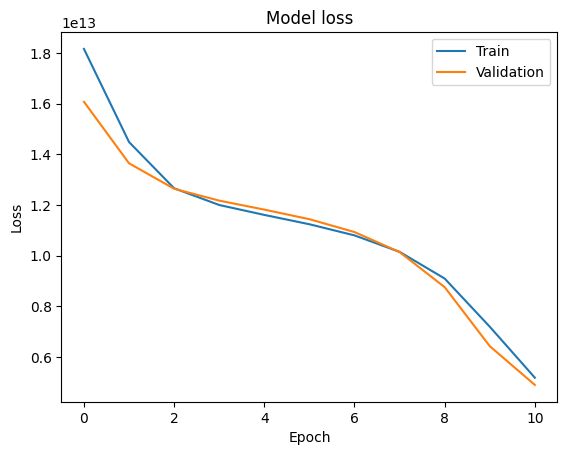

(952788.8276246408,
 2131944.479543965,
 20.184254131473097,
 1015089.8687440031,
 2129147.214285303,
 21.54318553140322)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

features = [
    'living_area_fixed',
    'post',
    'sell_date_fixed',
    'housing_association_org_number',
    'locality',
    'floor',
    'street_address',
    'street_name',
    'rooms',
    'legal_district',
    'brokers_description',
    'avg_room_area',
    'additional_area_fixed',
    'rent_fixed',
    'asking_price_fixed',
    'rent_per_sqm',
    'price_per_sqm',
    'construction_year',
    'age_new_construction_interaction',
    'total_units',
    'number_of_units',
    'long_term_real_estate_debt_fixed',
    'agency_id',
    'number_of_rental_units',
    'plot_is_leased',
    'sell_year',
    'operating_cost_to_living_area_ratio'

]
X = df[features]
y = df['sell_price']


if not pd.api.types.is_datetime64_any_dtype(X['sell_date_fixed']):
    X['sell_date_fixed'] = pd.to_datetime(X['sell_date_fixed'], errors='coerce')

# Extracting year, month, and day
X['sell_year'] = X['sell_date_fixed'].dt.year
X['sell_month'] = X['sell_date_fixed'].dt.month
X['sell_day'] = X['sell_date_fixed'].dt.day
X = X.drop(columns=['sell_date_fixed'])

categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Converting categorical columns to 'category' dtype
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=22)

# Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, validation_split=0.2, epochs=11, batch_size=32)

# Making predictions
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# Evaluating the model
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print performance metrics
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {train_mape}%")

print("\nTest Set Evaluation:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {test_mape}%")

# Plotting the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

(train_mae, train_rmse, train_mape, test_mae, test_rmse, test_mape)


Training Set Evaluation:
Mean Absolute Error (MAE): 963333.86409114
Root Mean Squared Error (RMSE): 1855610.4683764346
Mean Absolute Percentage Error (MAPE): 21.376231253522757%

Test Set Evaluation:
Mean Absolute Error (MAE): 1004413.7990591927
Root Mean Squared Error (RMSE): 1895427.9551989143
Mean Absolute Percentage Error (MAPE): 22.235014344567155%

In [ ]:
!pip install keras-tuner
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras_tuner import RandomSearch
import numpy as np
import matplotlib.pyplot as plt

features = [
    'living_area_fixed',
    'post',
    'sell_date_fixed',
    'housing_association_org_number',
    'locality',
    'floor',
    'street_address',
    'street_name',
    'rooms',
    'legal_district',
    'brokers_description',
    'avg_room_area',
    'additional_area_fixed',
    'rent_fixed',
    'asking_price_fixed',
    'rent_per_sqm',
    'price_per_sqm',
    'construction_year',
    'age_new_construction_interaction',
    'total_units',
    'number_of_units',
    'long_term_real_estate_debt_fixed',
    'agency_id',
    'number_of_rental_units',
    'plot_is_leased',
    'sell_year',
    'operating_cost_to_living_area_ratio'

]
X = df[features]
y = df['sell_price']

# Convert 'sell_date_fixed' to datetime
if not pd.api.types.is_datetime64_any_dtype(X['sell_date_fixed']):
    X['sell_date_fixed'] = pd.to_datetime(X['sell_date_fixed'], errors='coerce')

X['sell_year'] = X['sell_date_fixed'].dt.year
X['sell_month'] = X['sell_date_fixed'].dt.month
X['sell_day'] = X['sell_date_fixed'].dt.day
X = X.drop(columns=['sell_date_fixed'])

categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Converting categorical columns to 'category' dtype
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=22)

# Define the model building function
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)))

    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):  # Number of hidden layers
        model.add(Dense(units=hp.Int(f'units_{i+2}', min_value=32, max_value=128, step=32), activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i+2}', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='mean_squared_error'
    )

    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='house_price_tuning'
)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
y_train_pred = best_model.predict(X_train).flatten()
y_test_pred = best_model.predict(X_test).flatten()

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print performance metrics
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {train_mape}%")

print("\nTest Set Evaluation:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {test_mape}%")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


<ipython-input-44-fbd43fffe311>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sell_date_fixed'] = pd.to_datetime(X['sell_date_fixed'], errors='coerce')
<ipython-input-44-fbd43fffe311>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sell_year'] = X['sell_date_fixed'].dt.year
<ipython-input-44-fbd43fffe311>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
64                |64                |units1
0.5               |0.5               |dropout1
1                 |1                 |num_layers
96                |96                |units_2
0.3               |0.3               |dropout_2
adam              |adam              |optimizer

Epoch 1/50
3493/3493 [==============================] - 19s 5ms/step - loss: 19269544837120.0000 - val_loss: 15591117160448.0000
Epoch 2/50
3493/3493 [==============================] - 17s 5ms/step - loss: 15164004892672.0000 - val_loss: 14492853338112.0000
Epoch 3/50
3493/3493 [==============================] - 17s 5ms/step - loss: 14224893935616.0000 - val_loss: 13625803669504.0000
Epoch 4/50
3493/3493 [==============================] - 16s 5ms/step - loss: 13438551064576.0000 - val_loss: 12882695684096.0000
Epoch 5/50
3493/3493 [==============================] - 16s 5ms/step - loss: 12742907920384.0000 - val_loss: 12191047614

KeyboardInterrupt: 

## Extreme Values

<ipython-input-45-ce4bfe0b7f93>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sell_date_fixed'] = pd.to_datetime(X['sell_date_fixed'], errors='coerce')
<ipython-input-45-ce4bfe0b7f93>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sell_year'] = X['sell_date_fixed'].dt.year
<ipython-input-45-ce4bfe0b7f93>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Epoch 1/11
3493/3493 [==============================] - 22s 6ms/step - loss: 16002605645824.0000 - val_loss: 13410860269568.0000
Epoch 2/11
3493/3493 [==============================] - 19s 6ms/step - loss: 11903352963072.0000 - val_loss: 10606845362176.0000
Epoch 3/11
3493/3493 [==============================] - 19s 6ms/step - loss: 9295552839680.0000 - val_loss: 8696739397632.0000
Epoch 4/11
3493/3493 [==============================] - 19s 6ms/step - loss: 8064848625664.0000 - val_loss: 7916975816704.0000
Epoch 5/11
3493/3493 [==============================] - 19s 6ms/step - loss: 7466347659264.0000 - val_loss: 7453350559744.0000
Epoch 6/11
3493/3493 [==============================] - 20s 6ms/step - loss: 7054860222464.0000 - val_loss: 7089605836800.0000
Epoch 7/11
3493/3493 [==============================] - 19s 6ms/step - loss: 6736839704576.0000 - val_loss: 6789488181248.0000
Epoch 8/11
3493/3493 [==============================] - 20s 6ms/step - loss: 6476586811392.0000 - val_loss:

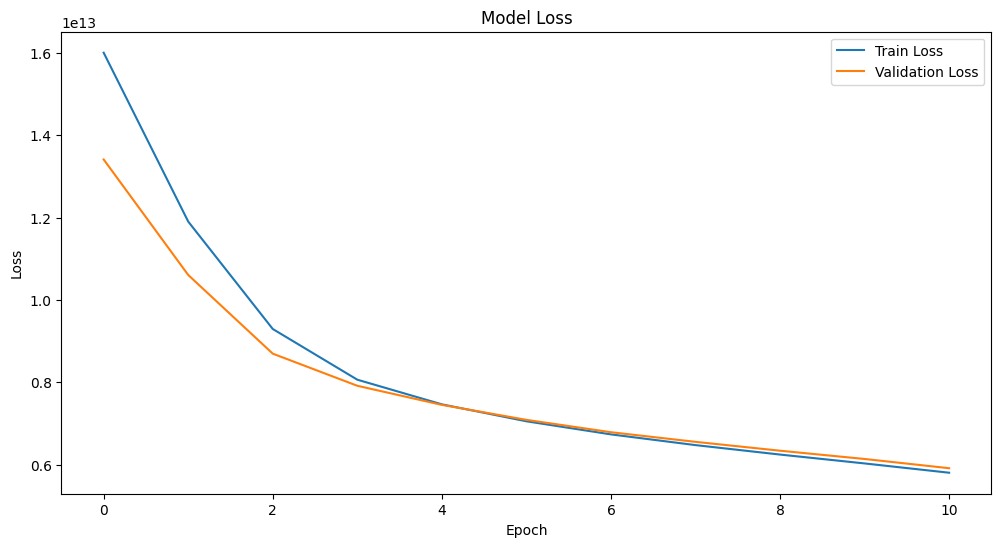

KeyError: "['street_name', 'locality', 'brokers_description', 'legal_district', 'agency_id'] not in index"

In [ ]:
# Introducing Extreme Values
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Define features and target
features = [
    'living_area_fixed',
    'post',
    'sell_date_fixed',
    'housing_association_org_number',
    'locality',
    'floor',
    'street_address',
    'street_name',
    'rooms',
    'legal_district',
    'brokers_description',
    'avg_room_area',
    'additional_area_fixed',
    'rent_fixed',
    'asking_price_fixed',
    'rent_per_sqm',
    'price_per_sqm',
    'construction_year',
    'age_new_construction_interaction',
    'total_units',
    'number_of_units',
    'long_term_real_estate_debt_fixed',
    'agency_id',
    'number_of_rental_units',
    'plot_is_leased',
    'sell_year',
    'operating_cost_to_living_area_ratio'

]
X = df[features]
y = df['sell_price']

if not pd.api.types.is_datetime64_any_dtype(X['sell_date_fixed']):
    X['sell_date_fixed'] = pd.to_datetime(X['sell_date_fixed'], errors='coerce')

X['sell_year'] = X['sell_date_fixed'].dt.year
X['sell_month'] = X['sell_date_fixed'].dt.month
X['sell_day'] = X['sell_date_fixed'].dt.day
X = X.drop(columns=['sell_date_fixed'])

# Converting categorical columns
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=22)

# Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=11, batch_size=32)

# Making predictions
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# Evaluating the model
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print performance metrics
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {train_mape}%")

print("\nTest Set Evaluation:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {test_mape}%")

# Plotting the model loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Detecting and adding extreme values
extreme_values = pd.DataFrame({
    'post': [0],
    'housing_association_org_number': [99999],
    'living_area_fixed': [10000],
    'sell_year': [2100],
    'asking_price': [1e9]
})

# Apply the same preprocessing as for the training data
extreme_values_processed = pd.get_dummies(extreme_values, columns=categorical_features, drop_first=True)
extreme_values_scaled = scaler.transform(extreme_values_processed)

# Make predictions with extreme values
extreme_predictions = model.predict(extreme_values_scaled)
print(f"Predictions for extreme values: {extreme_predictions}")

# Plotting predictions for normal and extreme values
plt.figure(figsize=(12, 6))
plt.hist(y_test_pred, bins=30, alpha=0.5, label='Normal Predictions')
plt.hist(extreme_predictions, bins=30, alpha=0.5, label='Extreme Predictions')
plt.legend(loc='upper right')
plt.title('Histogram of Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.show()


# Section 6: Real Predictions

In [44]:
df_without_sell_price.head()

id  sell_date  sell_price  rooms  \
17   00069bea47457ba3481d5dd18d261768 2023-08-31         NaN    3.0   
23   00090ebf77bac09d3ba2687da05bc450 2023-10-12         NaN    3.0   
24   0009182b9d124db1b297f605ce6b8cc7 2023-08-31         NaN    2.0   
66   00195b396970db56d69e4764d7c8471d 2023-08-11         NaN    1.0   
203  004f85fed27e54fb0464441ae72c353a 2023-08-27         NaN    3.0   

            legal_district  postcode           locality      street_name  \
17           Spånga-Tensta     16356             Spånga  Norrskensbacken   
23        Hammarby Sjöstad     12066     Katarina/Sofia      Virkesvägen   
24               Skarpnäck     12130     Hammarbyhöjden  Sofielundsvägen   
66   Hägersten-Liljeholmen     12933     Hägerstensåsen        Bäckvägen   
203       Norra Djurgården     11422  Innanför tullarna    Valhallavägen   

    object_type      street_address  ... cost_efficiency_ratio  total_units  \
17    Apartment  Norrskensbacken 1B  ...              0.077316         75.0   
23    Apartment      Virkesvägen 9A  ...              0.134236        148.0   
24    Apartment  Sofielundsvägen 33  ...              0.182946        580.0   
66    Apartment       Bäckvägen 108  ...              0.199777         54.0   
203   Apartment    Valhallavägen 49  ...              0.289421        143.0   

     total_area residential_to_commercial_ratio  property_age  age_category  \
17       2710.0                        3.704861          25.0         21-30   
23      11196.5                     5076.500000           4.0           0-5   
24       8938.0                        5.142955           7.0          6-10   
66        739.0                      739.000000          81.0        51-100   
203      1956.0                        1.925466          93.0        51-100   

     weighted_property_age  age_new_construction_interaction  luxury_score  \
17                0.778801                             -25.0           NaN   
23                0.960789                              -4.0           NaN   
24                0.932394                              -7.0           NaN   
66                0.444858                             -81.0           NaN   
203               0.394554                             -93.0           NaN   

     sustainability_score  
17                    0.0  
23                    0.0  
24                    0.0  
66                    0.0  
203                   0.0  

[5 rows x 89 columns]

In [45]:
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np

# Load the scalers dictionary from a file
scalers = joblib.load('scalers.pkl')

# Replace infinite values with NaN
df_without_sell_price.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values with column means for numeric columns
numeric_cols = df_without_sell_price.select_dtypes(include=['int64', 'float64'])
df_without_sell_price[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

# Cap extremely large values (example: values larger than 3 standard deviations from the mean)
for col in numeric_cols.columns:
    if col != 'sell_price':  # Exclude the 'sell_price' column
        threshold = df_without_sell_price[col].mean() + 3 * df_without_sell_price[col].std()
        df_without_sell_price[col] = np.where(df_without_sell_price[col] > threshold, threshold, df_without_sell_price[col])

# Select columns to scale (excluding the target variable 'sell_price')
columns_to_scale = df_without_sell_price.select_dtypes(include=['int64', 'float64']).columns.drop('sell_price', errors='ignore')

# Apply the loaded scalers to the new data
for col in columns_to_scale:
    if col in scalers:
        scaler = scalers[col]
        df_without_sell_price[col] = scaler.transform(df_without_sell_price[[col]])

# Create missing value indicator columns if any
for col in df_without_sell_price.columns:
    if df_without_sell_price[col].isnull().any():
        df_without_sell_price[col + '_missing'] = df_without_sell_price[col].isnull()

# Final fill of missing values
numeric_cols = df_without_sell_price.select_dtypes(include=[np.number])
df_without_sell_price[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

# Print the head of the DataFrame to verify
print(df_without_sell_price.head())


<ipython-input-45-f9a4b07a1d8c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_sell_price.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-45-f9a4b07a1d8c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_sell_price[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())
<ipython-input-45-f9a4b07a1d8c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

                                   id  sell_date  sell_price     rooms  \
17   00069bea47457ba3481d5dd18d261768 2023-08-31         NaN  0.608850   
23   00090ebf77bac09d3ba2687da05bc450 2023-10-12         NaN  0.608850   
24   0009182b9d124db1b297f605ce6b8cc7 2023-08-31         NaN -0.424767   
66   00195b396970db56d69e4764d7c8471d 2023-08-11         NaN -1.458384   
203  004f85fed27e54fb0464441ae72c353a 2023-08-27         NaN  0.608850   

            legal_district  postcode           locality      street_name  \
17           Spånga-Tensta  2.154636             Spånga  Norrskensbacken   
23        Hammarby Sjöstad -0.264071     Katarina/Sofia      Virkesvägen   
24               Skarpnäck -0.227988     Hammarbyhöjden  Sofielundsvägen   
66   Hägersten-Liljeholmen  0.224744     Hägerstensåsen        Bäckvägen   
203       Norra Djurgården -0.627159  Innanför tullarna    Valhallavägen   

    object_type      street_address  ... sustainability_score  \
17    Apartment  Norrskensbacken 

<ipython-input-45-f9a4b07a1d8c>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_sell_price[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())


In [46]:
import pandas as pd
import joblib
from sklearn.preprocessing import RobustScaler

# Load the trained model, scalers, and categorical mappings
modelLGBM = joblib.load('lgbm_regressor_model.pkl')
scalers = joblib.load('scalers.pkl')  # Dictionary of scalers
categorical_mappings = joblib.load('categorical_mappings.pkl')  # Dictionary of category mappings

# Define a function to convert dates to ordinal
def convert_date_to_ordinal(date):
    return pd.to_datetime(date).apply(lambda x: x.toordinal())

# Apply transformations
df_without_sell_price['sell_date'] = convert_date_to_ordinal(df_without_sell_price['sell_date'])

# Define the expected features
expected_features = [
      'living_area_fixed',
    'post',
    'sell_date_fixed',
    'housing_association_org_number',
    'locality',
    'floor',
    'street_address',
    'street_name',
    'rooms',
    'legal_district',
    'brokers_description',
    'avg_room_area',
    'additional_area_fixed',
    'rent_fixed',
    'asking_price_fixed',
    'rent_per_sqm',
    'price_per_sqm',
    'construction_year',
    'age_new_construction_interaction',
    'total_units',
    'number_of_units',
    'long_term_real_estate_debt_fixed',
    'agency_id',
    'number_of_rental_units',
    'plot_is_leased',
    'sell_year',
    'operating_cost_to_living_area_ratio'

]

# Ensure all expected features are present in the dataset
for feature in expected_features:
    if feature not in df_without_sell_price.columns:
        df_without_sell_price[feature] = 0

X_new = df_without_sell_price[expected_features]

# Handle datetime features
if 'sell_date' in X_new.columns:
    X_new['sell_year'] = X_new['sell_date'].dt.year
    X_new['sell_month'] = X_new['sell_date'].dt.month
    X_new['sell_day'] = X_new['sell_date'].dt.day
    X_new = X_new.drop(columns=['sell_date'])

# Identify categorical features and convert them
categorical_features = [col for col in X_new.columns if X_new[col].dtype == 'object']

# Convert categorical features to 'category' dtype and apply saved mappings
for col in categorical_features:
    if col in categorical_mappings:
        X_new[col] = pd.Categorical(X_new[col], categories=categorical_mappings[col])

# Scale numerical features using the saved scalers
numerical_features = [col for col in X_new.columns if col not in categorical_features]
for col in numerical_features:
    if col in scalers:
        scaler = scalers[col]
        X_new[col] = scaler.transform(X_new[[col]])

# Make predictions
df_without_sell_price['predicted_sell_price'] = modelLGBM.predict(X_new)

# Save predictions to a JSON file
predictions = df_without_sell_price[['id', 'predicted_sell_price']]
predictions.to_json('95788_assignment2.json', orient='records')

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=10


<ipython-input-46-19776cc6598f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_sell_price['sell_date'] = convert_date_to_ordinal(df_without_sell_price['sell_date'])
<ipython-input-46-19776cc6598f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new[col] = pd.Categorical(X_new[col], categories=categorical_mappings[col])
<ipython-input-46-19776cc6598f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

# Section 7: Validating JSON File

In [47]:
import pandas as pd

# Load the dataset
predictions_df = pd.read_json('/content/95788_assignment2.json')

print(predictions_df.head())


                                 id  predicted_sell_price
0  00069bea47457ba3481d5dd18d261768          1.194162e+06
1  00090ebf77bac09d3ba2687da05bc450          1.550581e+06
2  0009182b9d124db1b297f605ce6b8cc7          1.666665e+06
3  00195b396970db56d69e4764d7c8471d          1.384877e+06
4  004f85fed27e54fb0464441ae72c353a          1.428705e+06


<ipython-input-48-7df494e63b9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_sell_price['sell_price'] = pd.to_numeric(df_with_sell_price['sell_price'], errors='coerce')


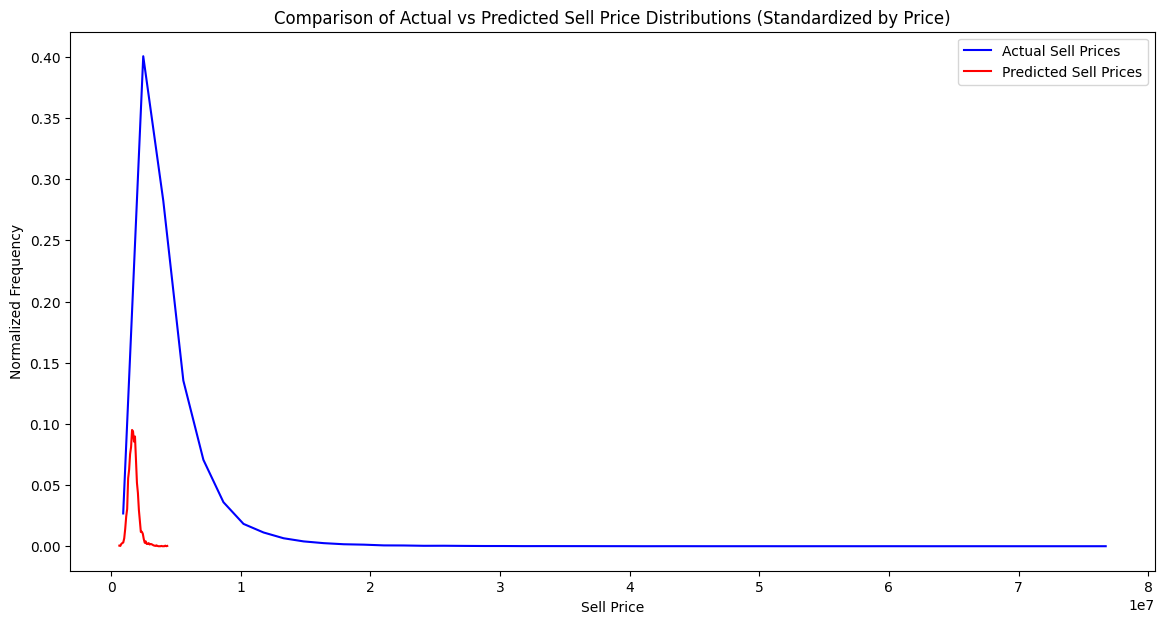

In [48]:

# Mapping Distributions

## Ensure the columns are numeric
df_with_sell_price['sell_price'] = pd.to_numeric(df_with_sell_price['sell_price'], errors='coerce')
predictions_df['predicted_sell_price'] = pd.to_numeric(predictions_df['predicted_sell_price'], errors='coerce')

# Normalize the data by price
def normalize_data(df, column):
    # Drop NaN values
    data = df[column].dropna()

    # Compute histogram
    counts, bin_edges = np.histogram(data, bins=50, density=True)

    # Compute bin centers
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # Normalize histogram
    normalized_counts = counts / counts.sum()

    return bin_centers, normalized_counts

# Normalize the actual and predicted prices
bin_centers_actual, normalized_counts_actual = normalize_data(df_with_sell_price, 'sell_price')
bin_centers_pred, normalized_counts_pred = normalize_data(predictions_df, 'predicted_sell_price')

# Plotting the normalized distributions
plt.figure(figsize=(14, 7))

# Plot normalized distribution of actual sell prices
plt.plot(bin_centers_actual, normalized_counts_actual, label='Actual Sell Prices', color='blue')

# Plot normalized distribution of predicted sell prices
plt.plot(bin_centers_pred, normalized_counts_pred, label='Predicted Sell Prices', color='red')

plt.title('Comparison of Actual vs Predicted Sell Price Distributions (Standardized by Price)')
plt.xlabel('Sell Price')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.show()

<ipython-input-49-27dc6082ea02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_sell_price['sell_price'] = pd.to_numeric(df_with_sell_price['sell_price'], errors='coerce')
<ipython-input-49-27dc6082ea02>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_sell_price['price_category'] = pd.cut(df_with_sell_price['sell_price'], bins=bins, labels=labels)


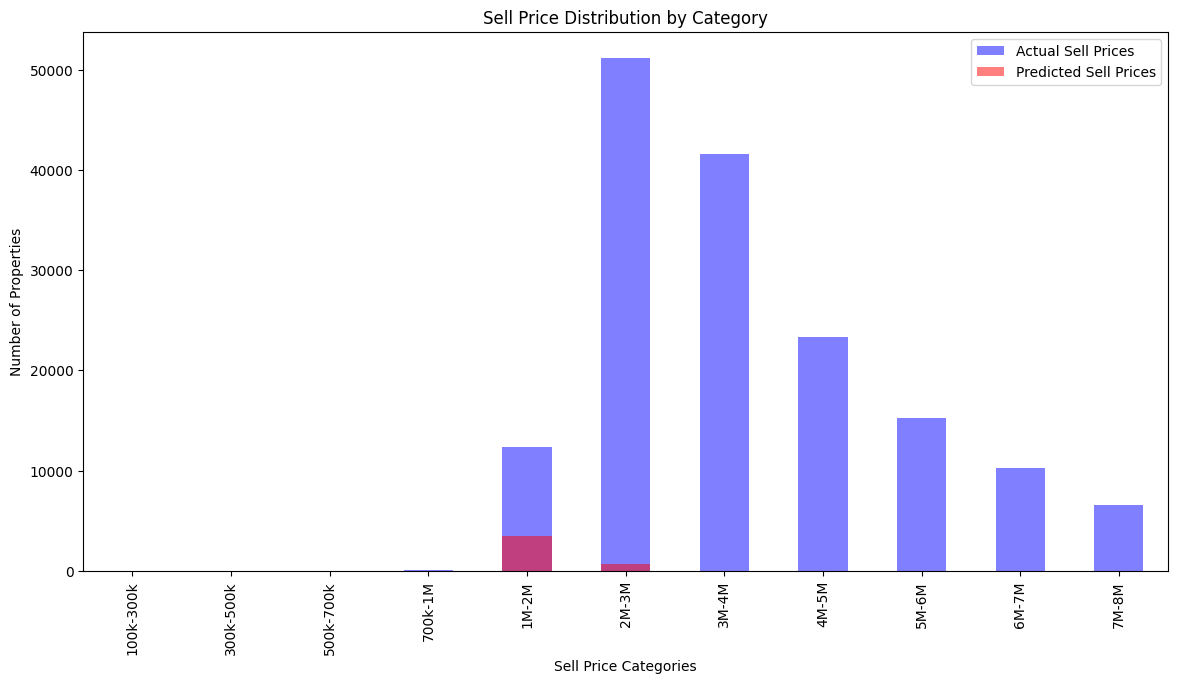

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the columns are numeric
df_with_sell_price['sell_price'] = pd.to_numeric(df_with_sell_price['sell_price'], errors='coerce')
predictions_df['predicted_sell_price'] = pd.to_numeric(predictions_df['predicted_sell_price'], errors='coerce')

# bins
bins = [100000, 300000, 500000, 700000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000]

# labels for the bins
labels = ['100k-300k', '300k-500k', '500k-700k', '700k-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M']


df_with_sell_price['price_category'] = pd.cut(df_with_sell_price['sell_price'], bins=bins, labels=labels)

predictions_df['price_category'] = pd.cut(predictions_df['predicted_sell_price'], bins=bins, labels=labels)

# Count occurrences in each category
actual_counts = df_with_sell_price['price_category'].value_counts().sort_index()
predicted_counts = predictions_df['price_category'].value_counts().sort_index()

# Plotting the counts per category
plt.figure(figsize=(14, 7))

# Plot actual sell price distribution by category
actual_counts.plot(kind='bar', alpha=0.5, color='blue', label='Actual Sell Prices')

# Plot predicted sell price distribution by category
predicted_counts.plot(kind='bar', alpha=0.5, color='red', label='Predicted Sell Prices')

plt.title('Sell Price Distribution by Category')
plt.xlabel('Sell Price Categories')
plt.ylabel('Number of Properties')
plt.legend()
plt.show()


In [50]:
import pandas as pd

# Ensure the columns are numeric
df_with_sell_price['sell_price'] = pd.to_numeric(df_with_sell_price['sell_price'], errors='coerce')
predictions_df['predicted_sell_price'] = pd.to_numeric(predictions_df['predicted_sell_price'], errors='coerce')

# Define the price ranges (bins)
bins = [100000, 300000, 500000, 700000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000]

# Define labels for the bins
labels = ['100k-300k', '300k-500k', '500k-700k', '700k-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M']

# Categorize actual sell prices
df_with_sell_price['price_category'] = pd.cut(df_with_sell_price['sell_price'], bins=bins, labels=labels)

# Categorize predicted sell prices
predictions_df['price_category'] = pd.cut(predictions_df['predicted_sell_price'], bins=bins, labels=labels)

# Count occurrences in each category
actual_counts = df_with_sell_price['price_category'].value_counts().sort_index()
predicted_counts = predictions_df['price_category'].value_counts().sort_index()

# Combine the counts into a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Sell Prices': actual_counts,
    'Predicted Sell Prices': predicted_counts
}).fillna(0).astype(int)

# Display the comparison table
print(comparison_df)


                Actual Sell Prices  Predicted Sell Prices
price_category                                           
100k-300k                        1                      0
300k-500k                        1                      0
500k-700k                        2                      3
700k-1M                         73                     39
1M-2M                        12319                   3530
2M-3M                        51198                    697
3M-4M                        41630                     32
4M-5M                        23309                      3
5M-6M                        15296                      0
6M-7M                        10300                      0
7M-8M                         6595                      0


<ipython-input-50-5876e9016a00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_sell_price['sell_price'] = pd.to_numeric(df_with_sell_price['sell_price'], errors='coerce')
<ipython-input-50-5876e9016a00>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_sell_price['price_category'] = pd.cut(df_with_sell_price['sell_price'], bins=bins, labels=labels)


                                 id  predicted_sell_price
0  00069bea47457ba3481d5dd18d261768          5.327413e+06
1  00090ebf77bac09d3ba2687da05bc450          5.120815e+06
2  0009182b9d124db1b297f605ce6b8cc7          3.905972e+06
3  00195b396970db56d69e4764d7c8471d          2.766624e+06
4  004f85fed27e54fb0464441ae72c353a          4.836215e+06


<ipython-input-51-d1b84ac457a7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_sell_price['sell_price'] = pd.to_numeric(df_with_sell_price['sell_price'], errors='coerce')
<ipython-input-51-d1b84ac457a7>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_sell_price['price_category'] = pd.cut(df_with_sell_price['sell_price'], bins=bins, labels=labels)


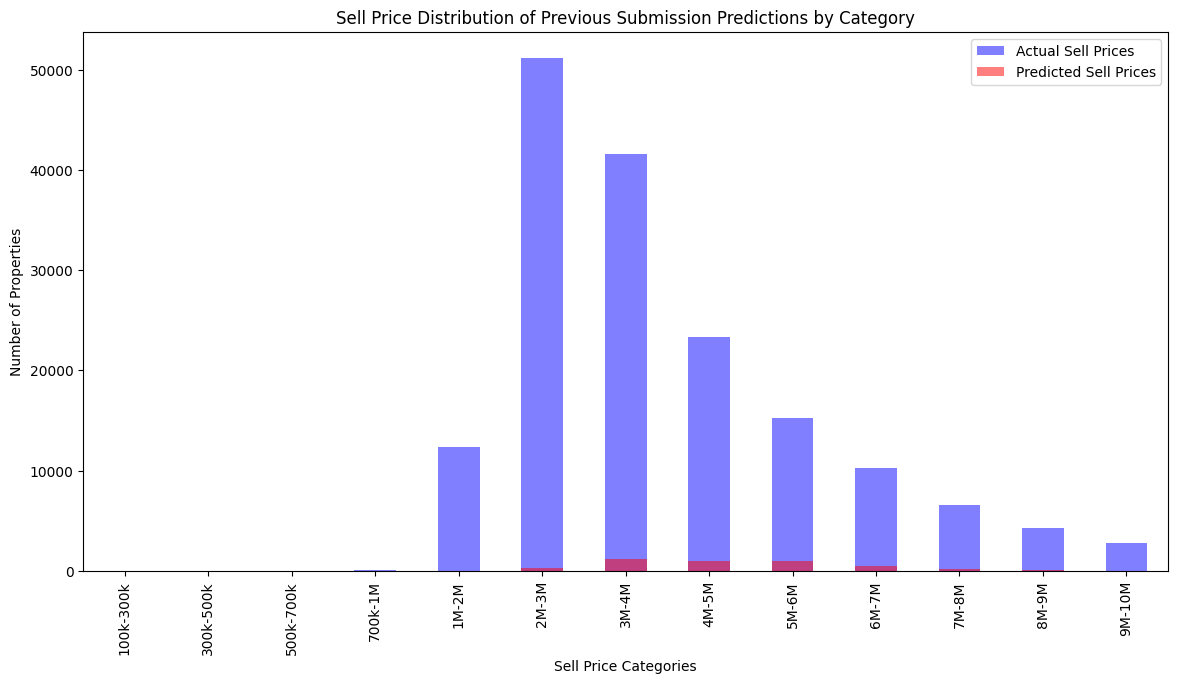

                Actual Sell Prices  Previously Predicted Sell Prices
price_category                                                      
100k-300k                        1                                 0
300k-500k                        1                                 0
500k-700k                        2                                 0
700k-1M                         73                                 0
1M-2M                        12319                                 0
2M-3M                        51198                               322
3M-4M                        41630                              1168
4M-5M                        23309                              1024
5M-6M                        15296                               965
6M-7M                        10300                               500
7M-8M                         6595                               161
8M-9M                         4273                                79
9M-10M                        2756

<ipython-input-51-d1b84ac457a7>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_sell_price['sell_price'] = pd.to_numeric(df_with_sell_price['sell_price'], errors='coerce')
<ipython-input-51-d1b84ac457a7>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_sell_price['price_category'] = pd.cut(df_with_sell_price['sell_price'], bins=bins, labels=labels)


In [51]:
import pandas as pd

# Load the dataset
previous_submission_predictions_df = pd.read_json('/content/Previous_Submission.json')

# Display the first few rows of the dataframe to verify
print(previous_submission_predictions_df.head())

import pandas as pd
import matplotlib.pyplot as plt

# Ensure the columns are numeric
df_with_sell_price['sell_price'] = pd.to_numeric(df_with_sell_price['sell_price'], errors='coerce')
previous_submission_predictions_df['predicted_sell_price'] = pd.to_numeric(previous_submission_predictions_df['predicted_sell_price'], errors='coerce')

# bins
bins = [100000, 300000, 500000, 700000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]

# labels for the bins
labels = ['100k-300k', '300k-500k', '500k-700k', '700k-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M']

# Categorize actual sell prices
df_with_sell_price['price_category'] = pd.cut(df_with_sell_price['sell_price'], bins=bins, labels=labels)

# Categorize predicted sell prices
previous_submission_predictions_df['price_category'] = pd.cut(previous_submission_predictions_df['predicted_sell_price'], bins=bins, labels=labels)

# Count occurrences in each category
actual_counts = df_with_sell_price['price_category'].value_counts().sort_index()
predicted_counts = previous_submission_predictions_df['price_category'].value_counts().sort_index()

# Plotting the counts per category
plt.figure(figsize=(14, 7))

# Plot actual sell price distribution by category
actual_counts.plot(kind='bar', alpha=0.5, color='blue', label='Actual Sell Prices')

# Plot predicted sell price distribution by category
predicted_counts.plot(kind='bar', alpha=0.5, color='red', label='Predicted Sell Prices')

plt.title('Sell Price Distribution of Previous Submission Predictions by Category')
plt.xlabel('Sell Price Categories')
plt.ylabel('Number of Properties')
plt.legend()
plt.show()

# Ensure the columns are numeric
df_with_sell_price['sell_price'] = pd.to_numeric(df_with_sell_price['sell_price'], errors='coerce')
previous_submission_predictions_df['predicted_sell_price'] = pd.to_numeric(previous_submission_predictions_df['predicted_sell_price'], errors='coerce')

# Define the price ranges (bins)
bins = [100000, 300000, 500000, 700000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]

# Define labels for the bins
labels = ['100k-300k', '300k-500k', '500k-700k', '700k-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M']

# Categorize actual sell prices
df_with_sell_price['price_category'] = pd.cut(df_with_sell_price['sell_price'], bins=bins, labels=labels)

# Categorize predicted sell prices
previous_submission_predictions_df['price_category'] = pd.cut(previous_submission_predictions_df['predicted_sell_price'], bins=bins, labels=labels)

# Count occurrences in each category
actual_counts = df_with_sell_price['price_category'].value_counts().sort_index()
predicted_counts = previous_submission_predictions_df['price_category'].value_counts().sort_index()

# Combine the counts into a DataFrame for comparison
old_predictions_comparison_df = pd.DataFrame({
    'Actual Sell Prices': actual_counts,
    'Previously Predicted Sell Prices': predicted_counts
}).fillna(0).astype(int)

# Display the comparison table
print(old_predictions_comparison_df)

